#Importación de librerías

In [2]:
#ANALISIS DE DATOS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#ANALISIS ESTADISTICOS
import scipy.stats as ss
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Descripción de la base de datos

##Título

La base de datos lleva por título 

**Students Performance in Exams**

[Link a la base de datos][1]

[1]: https://www.kaggle.com/spscientist/students-performance-in-exams

## Descripción

La base de datos **Students Performance in Exams** contiene los resultados de estudiantes en diversas pruebas escolares, en particular, pruebas de matemática, escritura y lectura. 

Los datos presentados son clasificaciones cualitativas para la representación de los resultados obtenidos durantes las pruebas.

**La base de datos no indica lo que se entiende por calificación aprobatoria o no, por lo tanto designamos que una calificación aprobatoria es aquella con un valor mayor o igual a 70.**

Las columnas de la base de datos son :

|Columna|Descripción|
|:--:|:--|
|gender|Indica el género del estudiante|
|race/ethnicity|Indica la raza o el grupo étnico del estudiante|
|parental level of education|Indica el grado académico de los padres de familia|
|lunch|Indica si el estudiante comió antes de las pruebas|
|test preparation course|Indica si el estudiante terminó el curso de preparación para las pruebas|
|math score|Puntaje en la prueba matemática|
|reading score|Puntaje en la prueba de lectura|
|writing score|Puntaje en la prueba de escritura|


# Justificación

La **principal razón para el análisis de esta base de datos fue determinar que indicadores influyen en la calificación de un estudiante para la aprobación de un examen** ya que, se sabe, existen amplia variabilidad por las cuales un estudiante puede llegar a tener un mal o buen rendimiento académico como : problemas familiares, no comer bien, el apoyo de los padres en temas escolares, apartado psicológico del estudiante, etc.

Estudiar esta base de datos puede darnos una idea de como ciertos factores afectan de manera positiva o negativa la calificación de un estudiante, además, es viable analizar los resultados académicos donde los estudiantes estén batallando más en obtener una calificación aprobatoria.

#Objetivo

* Determinar cuales son los indicadores que afectan el rendimiento académico y si existe alguna relación con las prueba matemática, lectura y redacción

* Calcular las proporciones entre indicadores para determinar cual está más relacionado con una calificación aprobatoria

* Calcular las proporciones entre indicadores para determinar cual está más relacionado con una calificación reprobatoria

* Estudiar la distribución de las calificaciones por examen

# Preguntas de interés

1. ¿Es cierto que el género, el grupo étnico, el grado académico de los padres, la preparación al examen y el régimen alimenticio del estudiante esta relacionado de manera lineal con el rendimiento académico de un examen matemático, lectura y redacción?

2. ¿Cuál es la proporción del género, grupo étnico, grado académico de los padres, la preparación al examen y el régimen alimenticio del estudiante respecto a una calificación aprobatoria?

3. ¿Cuál es la proporción del género, grupo étnico, grado académico de los padres, la preparación al examen y el régimen alimenticio del estudiante respecto a una calificación reprobatoria?

4. ¿Cómo se distribuye las calificaciones de la prueba matemática, lectura y redacción?

5. ¿Cuáles son las estadísticas de las calificaciones de la prueba matemática, lectura y redacción?

#Limpieza de datos

Primero importamos la base de datos que está en formato csv mediante la librería pandas, lo asignamos a la variable 'Data'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Data = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')

Mostramos las primeras filas de 'Data' para visualizar los datos

In [5]:
Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Veamos la información de la base de datos mediante la función 'info()'

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Podemos observar que la base de datos contiene las columnas anteriormente mencionadas, no contiene valores nulos o perdidos y además los tipos de datos para cada columna son

|Columna|Tipo de dato|
|:--:|:--|
|gender|Texto|
|race/ethnicity|Texto|
|parental level of education|Texto|
|lunch|Texto|
|test preparation course|Texto|
|math score|Numérico (Entero)|
|reading score|Numérico (Entero)|
|writing score|Numérico (Entero)|

Por último, notamos que es un Data Frame compuesto por 1000 filas y 8 columnas, es decir, 8000 datos en total.

Para mayor comodida en la lectura y el análisis cambiaremos los nombres de las columnas al español mediante la instrucción 'columns'

In [7]:
Data.columns = ['Genero','Grupo Etnico','Educacion Parental',
                'Comida','Preparacion al Examen','Puntaje Matematicas',
                'Puntaje Lectura','Puntaje Escritura']

Volvemos a visualizar la base de datos para confirmar que los cambios se hicieron de manera correcta

In [8]:
Data.head()

,Genero,Grupo Etnico,Educacion Parental,Comida,Preparacion al Examen,Puntaje Matematicas,Puntaje Lectura,Puntaje Escritura
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Estadísticas básicas de la base de datos

Veamos las estadísticas de la base de datos, recordemos que las columnas 'Genero','Grupo Etnico','Educacion Parental','Comida','Preparacion al Examen' son tipo texto y por tanto no es viable obtener datos como la media o desviación estandar, por lo tanto usamos la función 'describe' añadiendo el argumento 'include = 'all'', esto nos ayudará a obtener estadísticos viables a las columnas tipo texto.

In [9]:
Data.describe(include = 'all')

,Genero,Grupo Etnico,Educacion Parental,Comida,Preparacion al Examen,Puntaje Matematicas,Puntaje Lectura,Puntaje Escritura
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Analizando columa por columna podemos obtener las siguiente conclusiones.

* Genero : Existen solamente dos tipos de datos, el dato más frecuente es 'female', es decir, mujer. El dato 'female' aparece con una frecuencia de 518 veces

* Grupo Etnico : Existen cinco tipos de datos distintos, el dato más frecuente es 'group C'. El dato 'group C' aparece con una frecuencia de 319 veces

* Educacion Parental : Existen seis tipos de datos distintos, el dato más frecuente es 'some college', es decir, que tienen algún grado académico. El dato 'some college' aparece con una frecuencia de 226 veces

* Comida : Existen solamente dos tipo de datos, el dato más frecuente es 'standard'. El dato 'standard' aparece con una frecuencia de 645 veces

* Preparacion al Examen : Existen solamente dos tipos de datos, el dato más frecuente es 'none', es decir ninguno. El dato 'none' aparece con una frecuencia de 642 veces

* Puntaje Matematicas : La media del puntaje de la prueba matemática es de $66.089$ con una desviación estándar de $15.16$ con una mínima de calificación $0$ y una máxima de $100$, se tiene que el $25\%$ de los datos tiene una puntuación de $57$, el $50\%$ de los datos tiene una puntuación de $66$ y el $75\%$ de los datos tiene una puntuación de $77$.

* Puntaje Lectura : La media del puntaje de la prueba lectura es de $69.17$ con una desviación estándar $14.6$ con una mínima de calificación $17$ y una máxima de $100$, se tiene que el $25\%$ de los datos tiene una puntuación de $59$, el $50\%$ de los datos tiene una puntuación de $70$ y el $79\%$ de los datos tiene una puntuación de $77$.

* Puntaje Escritura : La media del puntaje de la prueba escritura es de $68.05$ con una desviación estándar de $15.19$ con una mínima de $10$ y una máxima de $100$, se tiene que el $25\%$ de los datos tiene una puntuación de $57.75$, el $50\%$ de los datos tiene una puntuación de $69$ y el $79\%$ de los datos tiene una puntuación de $77$.

Para poder estudiar de manera estadística cada una de las columnas tipo texto utilizaremos la función 'get_dummies' la cual mediante una asignación binaria nos regresará un DataFrame con las asignaciones de cada una de las variables. Este resultado lo asignamos a la variable 'Variables_Dummies'

In [10]:
Variables_Dummies = pd.get_dummies(Data.loc[:,['Genero','Grupo Etnico','Educacion Parental','Comida','Preparacion al Examen']])

Veamos el resultado contenido en 'Variables_Dummies'

In [11]:
Variables_Dummies

,Genero_female,Genero_male,Grupo Etnico_group A,Grupo Etnico_group B,Grupo Etnico_group C,Grupo Etnico_group D,Grupo Etnico_group E,Educacion Parental_associate's degree,Educacion Parental_bachelor's degree,Educacion Parental_high school,Educacion Parental_master's degree,Educacion Parental_some college,Educacion Parental_some high school,Comida_free/reduced,Comida_standard,Preparacion al Examen_completed,Preparacion al Examen_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


Nuevamente para favorecer la lectura y el análisis modificaremos los nombres de estas columnas

In [12]:
Variables_Dummies.columns = ['Mujer','Hombre','Grupo Etnico A','Grupo Etnico B',
                       'Grupo Etnico C','Grupo Etnico D','Grupo Etnico E',
                       'Educacion Parental - Grado Asociado','Educacion Parental - Universitario',
                       'Educacion Parental - Preparatoria','Educacion Parental - Maestria','Educacion Parental - Colegio Asociado','Educacion Parental - Preparatoria Asociada',
                       'Comida - Incompleta','Comida - Completa','Curso Preparacion - Completo','Curso Preparacion - Incompleto']

Visualizamos los datos para verificar que los cambios realizar se dieron de manera correcta

In [13]:
Variables_Dummies

,Mujer,Hombre,Grupo Etnico A,Grupo Etnico B,Grupo Etnico C,Grupo Etnico D,Grupo Etnico E,Educacion Parental - Grado Asociado,Educacion Parental - Universitario,Educacion Parental - Preparatoria,Educacion Parental - Maestria,Educacion Parental - Colegio Asociado,Educacion Parental - Preparatoria Asociada,Comida - Incompleta,Comida - Completa,Curso Preparacion - Completo,Curso Preparacion - Incompleto
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


Para no modificar el Data Frame que contiene la base de datos original crearemos un nuevo Data Frame que usaremos para realizar el análisis datos y estadístico correspondiente. Lo asignaremos a la variable 'Data2'.

Concatenaremos el Data Frame 'Variables_Dummies' y las columnas 'Puntaje Matematicas', 'Puntaje Lectura' y 'Puntaje Escritura' para crear 'Data2' mediante la función 'concat'.

In [14]:
Data2 = pd.concat([Variables_Dummies,Data.loc[:,['Puntaje Matematicas','Puntaje Lectura','Puntaje Escritura']]],axis = 1)

Imprimimos 'Data2' para visualizar los cambios realizados

In [15]:
Data2

,Mujer,Hombre,Grupo Etnico A,Grupo Etnico B,Grupo Etnico C,Grupo Etnico D,Grupo Etnico E,Educacion Parental - Grado Asociado,Educacion Parental - Universitario,Educacion Parental - Preparatoria,Educacion Parental - Maestria,Educacion Parental - Colegio Asociado,Educacion Parental - Preparatoria Asociada,Comida - Incompleta,Comida - Completa,Curso Preparacion - Completo,Curso Preparacion - Incompleto,Puntaje Matematicas,Puntaje Lectura,Puntaje Escritura
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72,72,74
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69,90,88
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90,95,93
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47,57,44
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,88,99,95
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,62,55,55
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,59,71,65
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,68,78,77


Estudiaremos la correlación que existen entre las variables, en este caso particular utilizaremos el método **Spearman** pues no podemos asegurar que cada uno de los conjuntos se distribuya de manera normal. Esto lo hacemos mediante la función 'corr'

In [16]:
Data2.corr(method='spearman')

,Mujer,Hombre,Grupo Etnico A,Grupo Etnico B,Grupo Etnico C,Grupo Etnico D,Grupo Etnico E,Educacion Parental - Grado Asociado,Educacion Parental - Universitario,Educacion Parental - Preparatoria,Educacion Parental - Maestria,Educacion Parental - Colegio Asociado,Educacion Parental - Preparatoria Asociada,Comida - Incompleta,Comida - Completa,Curso Preparacion - Completo,Curso Preparacion - Incompleto,Puntaje Matematicas,Puntaje Lectura,Puntaje Escritura
Mujer,1.000000,-1.000000,-0.071001,0.028466,0.063368,-0.030566,-0.020302,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028,-0.159972,0.247349,0.312862
Hombre,-1.000000,1.000000,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028,0.159972,-0.247349,-0.312862
Grupo Etnico A,-0.071001,0.071001,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315,-0.103347,-0.098700,-0.113470
Grupo Etnico B,0.028466,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106,-0.079292,-0.054390,-0.067699
Grupo Etnico C,0.063368,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522,-0.076165,0.001896,-0.012206
Grupo Etnico D,-0.030566,0.030566,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956,0.057030,0.027256,0.077193
Grupo Etnico E,-0.020302,0.020302,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,-0.052398,0.052398,0.059393,-0.059393,0.204493,0.105400,0.088228
Educacion Parental - Grado Asociado,0.004835,-0.004835,-0.048658,-0.007238,0.037077,-0.044674,0.054922,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.009102,0.009102,0.012668,-0.012668,0.049257,0.060796,0.058019
Educacion Parental - Universitario,0.011638,-0.011638,0.016307,-0.019121,0.015682,-0.020556,0.013221,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,0.013668,-0.013668,0.024285,-0.024285,0.075317,0.083367,0.121815
Educacion Parental - Preparatoria,-0.037952,0.037952,0.004919,0.069093,0.007977,-0.042118,-0.039494,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,0.002211,-0.002211,-0.074446,0.074446,-0.123315,-0.148424,-0.183238


Acotaremos el Data Frame anterior a solamente visualizar la correlación que existe entre todas las variables y las columnas de los puntajes de los examenes dados.

In [17]:
Data2.corr(method='spearman').loc[:,['Puntaje Matematicas','Puntaje Lectura','Puntaje Escritura']]

,Puntaje Matematicas,Puntaje Lectura,Puntaje Escritura
Mujer,-0.159972,0.247349,0.312862
Hombre,0.159972,-0.247349,-0.312862
Grupo Etnico A,-0.103347,-0.098700,-0.113470
Grupo Etnico B,-0.079292,-0.054390,-0.067699
Grupo Etnico C,-0.076165,0.001896,-0.012206
Grupo Etnico D,0.057030,0.027256,0.077193
Grupo Etnico E,0.204493,0.105400,0.088228
Educacion Parental - Grado Asociado,0.049257,0.060796,0.058019
Educacion Parental - Universitario,0.075317,0.083367,0.121815
Educacion Parental - Preparatoria,-0.123315,-0.148424,-0.183238


De manera análoga realizaremos un estudio para visualizar la covarianza de los datos con la función 'cov'

In [18]:
Data2.cov().loc[:,['Puntaje Matematicas','Puntaje Lectura','Puntaje Escritura']]

,Puntaje Matematicas,Puntaje Lectura,Puntaje Escritura
Mujer,-1.273375,1.783241,2.288316
Hombre,1.273375,-1.783241,-2.288316
Grupo Etnico A,-0.397318,-0.400441,-0.479285
Grupo Etnico B,-0.501411,-0.345455,-0.466727
Grupo Etnico C,-0.518910,-0.020932,-0.072298
Grupo Etnico D,0.334016,0.225948,0.548400
Grupo Etnico E,1.083624,0.540881,0.469910
Educacion Parental - Grado Asociado,0.398641,0.390873,0.409421
Educacion Parental - Universitario,0.389888,0.452511,0.629257
Educacion Parental - Preparatoria,-0.775219,-0.876000,-1.099684


Analizamos la varianza de los datos con la función 'var'

In [19]:
Data2.var(axis = 0)

Mujer                                           0.249926
Hombre                                          0.249926
Grupo Etnico A                                  0.081160
Grupo Etnico B                                  0.154054
Grupo Etnico C                                  0.217456
Grupo Etnico D                                  0.193550
Grupo Etnico E                                  0.120521
Educacion Parental - Grado Asociado             0.172889
Educacion Parental - Universitario              0.104180
Educacion Parental - Preparatoria               0.157742
Educacion Parental - Maestria                   0.055575
Educacion Parental - Colegio Asociado           0.175099
Educacion Parental - Preparatoria Asociada      0.147106
Comida - Incompleta                             0.229204
Comida - Completa                               0.229204
Curso Preparacion - Completo                    0.230066
Curso Preparacion - Incompleto                  0.230066
Puntaje Matematicas            

#Gráficas

Estudiaremos la distribución de las calificaciones por examen

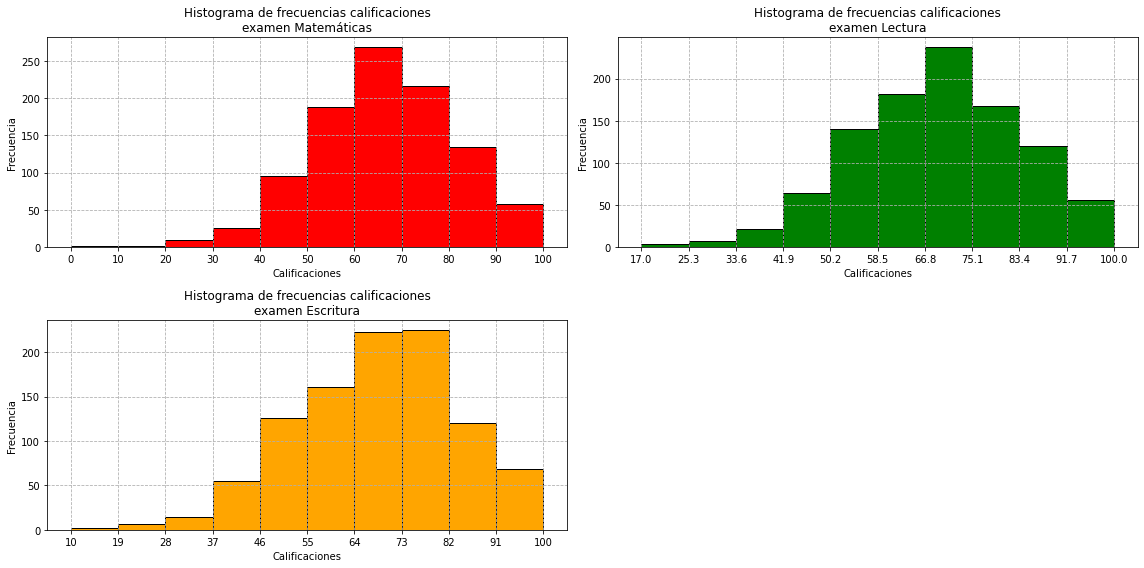

In [20]:
plt.subplot(221) #GRAFICO 1
cuenta1, bin_longitud1 = np.histogram(Data.loc[:,'Puntaje Matematicas'])
Data.loc[:,'Puntaje Matematicas'].plot(kind = 'hist',
                                       color = 'red',
                                       edgecolor = 'black',
                                       figsize = (16,8),
                                       xticks = bin_longitud1)
plt.title('Histograma de frecuencias calificaciones\nexamen Matemáticas')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.grid(linestyle = '--')

plt.subplot(222) #GRAFICO 2
cuenta2, bin_longitud2 = np.histogram(Data.loc[:,'Puntaje Lectura'])
Data.loc[:,'Puntaje Lectura'].plot(kind = 'hist',
                                   color = 'green',
                                   edgecolor = 'black',
                                   figsize = (16,8),
                                   xticks = bin_longitud2)
plt.title('Histograma de frecuencias calificaciones\nexamen Lectura')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.grid(linestyle = '--')

plt.subplot(223) #GRAFICO 3
cuenta3, bin_longitud3 = np.histogram(Data.loc[:,'Puntaje Escritura'])
Data.loc[:,'Puntaje Escritura'].plot(kind = 'hist',
                                     color = 'orange',
                                     edgecolor = 'black',
                                     figsize = (16,8),
                                     xticks = bin_longitud3)
plt.title('Histograma de frecuencias calificaciones\nexamen Escritura')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.grid(linestyle = '--')
plt.tight_layout()

Estudiaremos estas distribuciones de manera conjunta

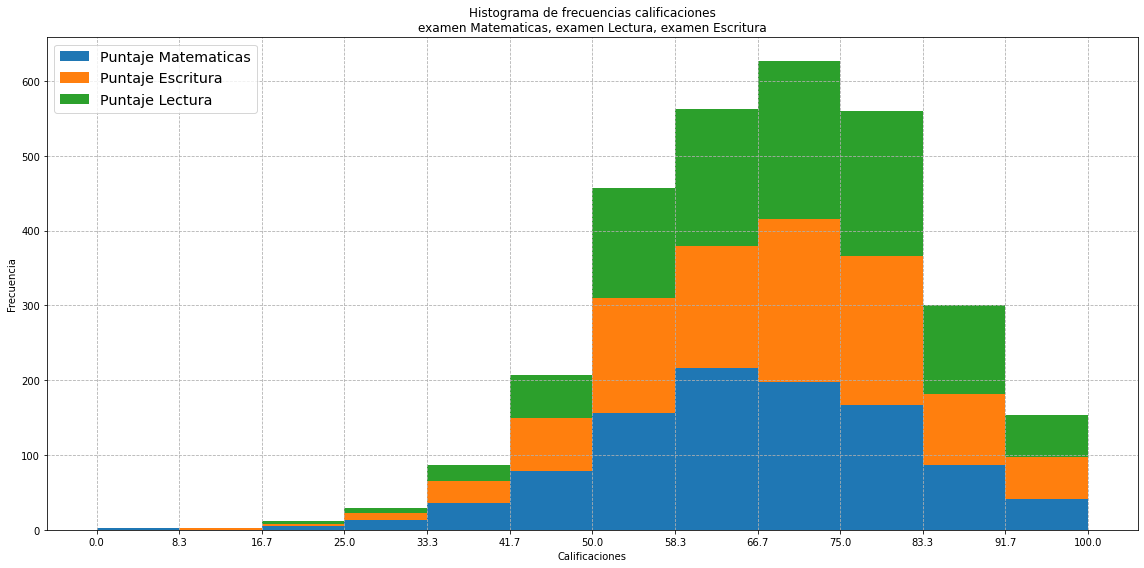

In [21]:
cuenta0, bin_longitud0 = np.histogram(Data.loc[:,['Puntaje Matematicas','Puntaje Escritura','Puntaje Lectura']],12)
Data.loc[:,['Puntaje Matematicas','Puntaje Escritura','Puntaje Lectura']].plot(kind = 'hist',
                                                                               xticks = bin_longitud0,
                                                                               bins = 12,figsize = (16,8),
                                                                               stacked = True)
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias calificaciones\nexamen Matematicas, examen Lectura, examen Escritura')
plt.grid(linestyle = '--')
plt.legend(loc = 'upper left',fontsize = 'x-large')
plt.tight_layout()

De las gráficas anteriores podemos observar la tendencia que se había visualizado en los estadísticos obtenidos de cada una de las columnas representativas a las calificaciones de cada examen, note pues así que las mayores frecuencias para el puntaje del examen de matemáticas oscilan entre $50$ y $80$ siendo el intervalo $60-70$ el que mayor frecuencia tiene.

Por su parte las mayores frecuencias del puntaje del examen de lectura oscilan entre $58.5$ y $83.4$ siendo el intervalo $66.8 - 75.1$ el que mayor frecuencia tiene. Por último las mayores frecuencias del puntaje del examen de escritura oscilan entre $55-82$ siendo el intervalo $73-82$ el que mayor frecuencia tiene.

Podemos realizar la conjetura de que el examen con el mayor número de reprobados es el examen de Matemáticas mientras que el examen con mayor número de aprobados es el examen de Lectura.

Es posible tener una idea de la veracidad de esta conjetura mediante un gráfico de cajas

<AxesSubplot:>

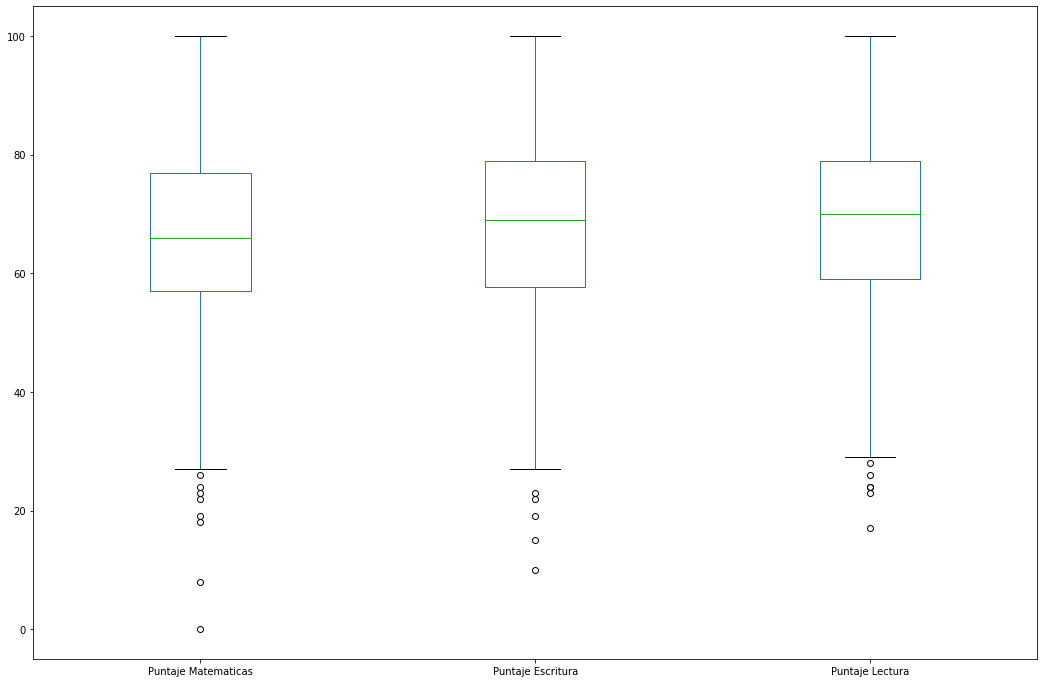

In [22]:
Data.loc[:,['Puntaje Matematicas','Puntaje Escritura','Puntaje Lectura']].plot(kind = 'box',figsize = (18,12))

Notemos que la mediana del puntaje de Matemáticas es menor a la mediana del puntaje de Escritura y Lectura, además es interesante resaltar que los valores atípicos en el puntaje de Matemáticas tienen mayor presencia que en los otros puntajes.

Notemos que el número de aprobados en cada examen es

In [23]:
print('Aprobados en el examen de Matematicas',len(Data.loc[ Data.loc[:,'Puntaje Matematicas'] >= 70].index))
print('\nAprobados en el examen de Escritura',len(Data.loc[ Data.loc[:,'Puntaje Escritura'] >= 70].index))
print('\nAprobados en el examen de Lectura',len(Data.loc[ Data.loc[:,'Puntaje Lectura'] >= 70].index))

Aprobados en el examen de Matematicas 409

Aprobados en el examen de Escritura 489

Aprobados en el examen de Lectura 513


Respectivamente el número de reprobados en cada examen es

In [24]:
print('Reprobados en el examen de Matematicas',len(Data.loc[ Data.loc[:,'Puntaje Matematicas'] < 70].index))
print('\nReprobados en el examen de Escritura',len(Data.loc[ Data.loc[:,'Puntaje Escritura'] < 70].index))
print('\nReprobados en el examen de Lectura',len(Data.loc[ Data.loc[:,'Puntaje Lectura'] < 70].index))

Reprobados en el examen de Matematicas 591

Reprobados en el examen de Escritura 511

Reprobados en el examen de Lectura 487


Así podemos asegurar que el examen con mayor número de aprobados es el examen de Lectura y el examen con el mayor número de reprobados es el examen de Matemáticas.

Estudiaremos la proporción de cada una de las variables respecto a las calificaciones aprobatorias de cada examen.

Sabemos que el número de aprobados en el examen de Matemáticas es $409$.

Asignaremos a la variable 'Matematicas_Aprobados' aquellos estudiantes que tuvieron una calificacion aprobatoria, usando la misma lógica crearemos la variable 'Escritura_Aprobados' y 'Lectura_Aprobados'.

In [25]:
Matematicas_Aprobados = Data.loc[ Data.loc[:,'Puntaje Matematicas'] >= 70]
Escritura_Aprobados = Data.loc[ Data.loc[:,'Puntaje Escritura'] >= 70]
Lectura_Aprobados = Data.loc[ Data.loc[:,'Puntaje Lectura'] >= 70]

Graficamos las proporciones asociadas a los alumnos aprobados en el examen de Matemáticas

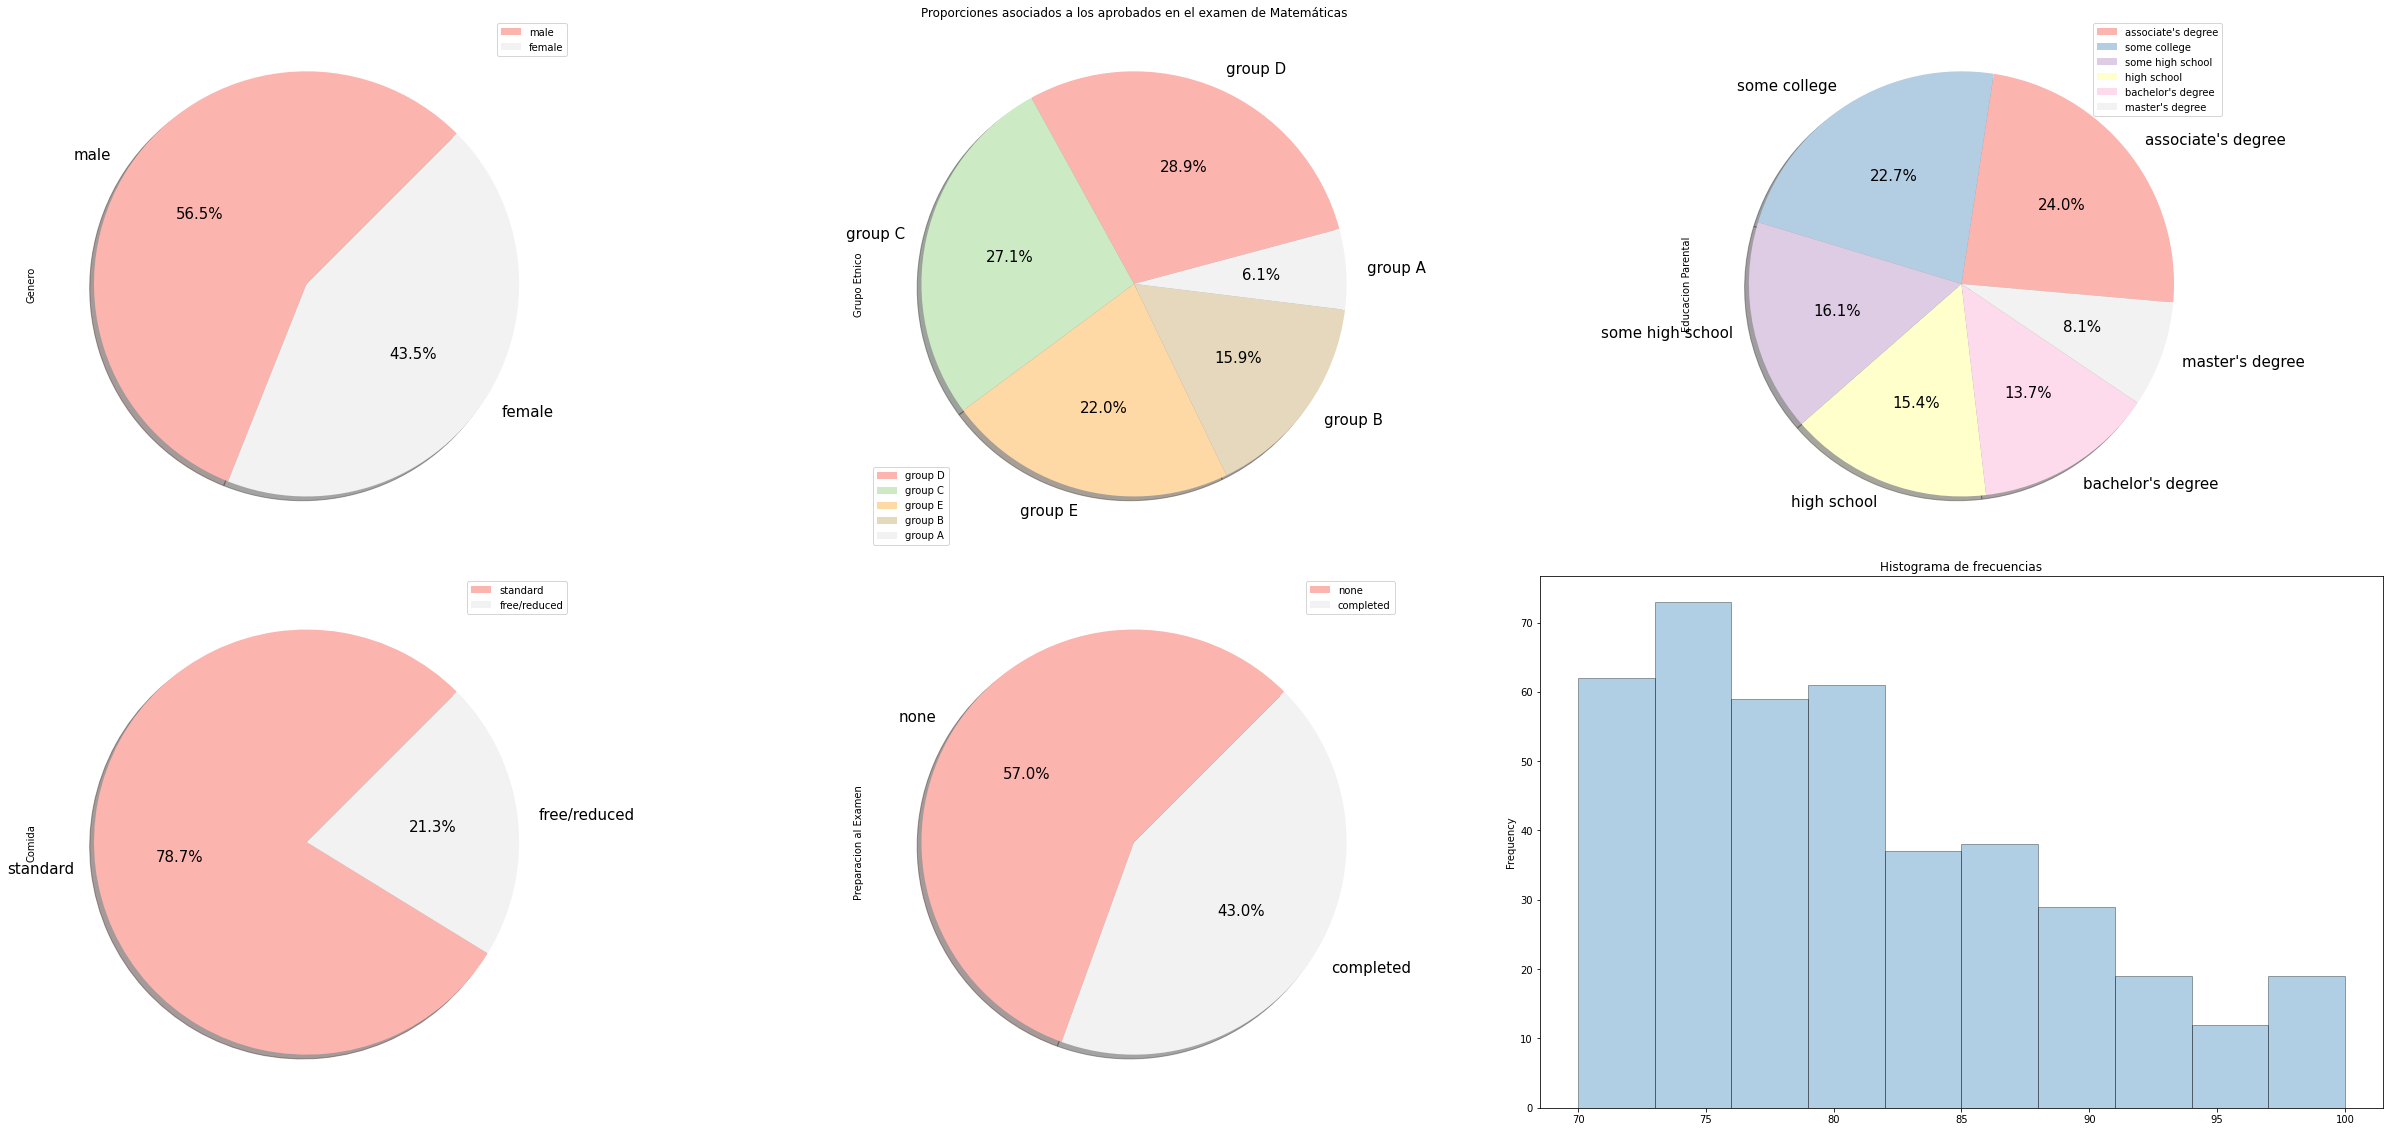

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize = (35,16))
Matematicas_Aprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'Pastel1',
                                                                     fontsize = 15,
                                                                     ax=axes[0,0])
Matematicas_Aprobados.loc[:,'Grupo Etnico'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 15,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'Pastel1',
                                                                     fontsize = 15,
                                                                     ax=axes[0,1])
Matematicas_Aprobados.loc[:,'Educacion Parental'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = -5,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'Pastel1',
                                                                     fontsize = 15,
                                                                     ax=axes[0,2])
Matematicas_Aprobados.loc[:,'Comida'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'Pastel1',
                                                                     fontsize = 15,
                                                                     ax=axes[1,0])
Matematicas_Aprobados.loc[:,'Preparacion al Examen'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     title = 'Proporciones asociados a los aprobados en el examen de Matemáticas',
                                                                     colormap = 'Pastel1',
                                                                     fontsize = 15,
                                                                     ax=axes[1,1])
Matematicas_Aprobados.loc[:,'Puntaje Matematicas'].plot(kind = 'hist',edgecolor = 'black',alpha = 0.35,title = 'Histograma de frecuencias',
                                                        ax = axes[1,2])

plt.tight_layout()

Graficamos las proporciones asociadas al examen de Escritura

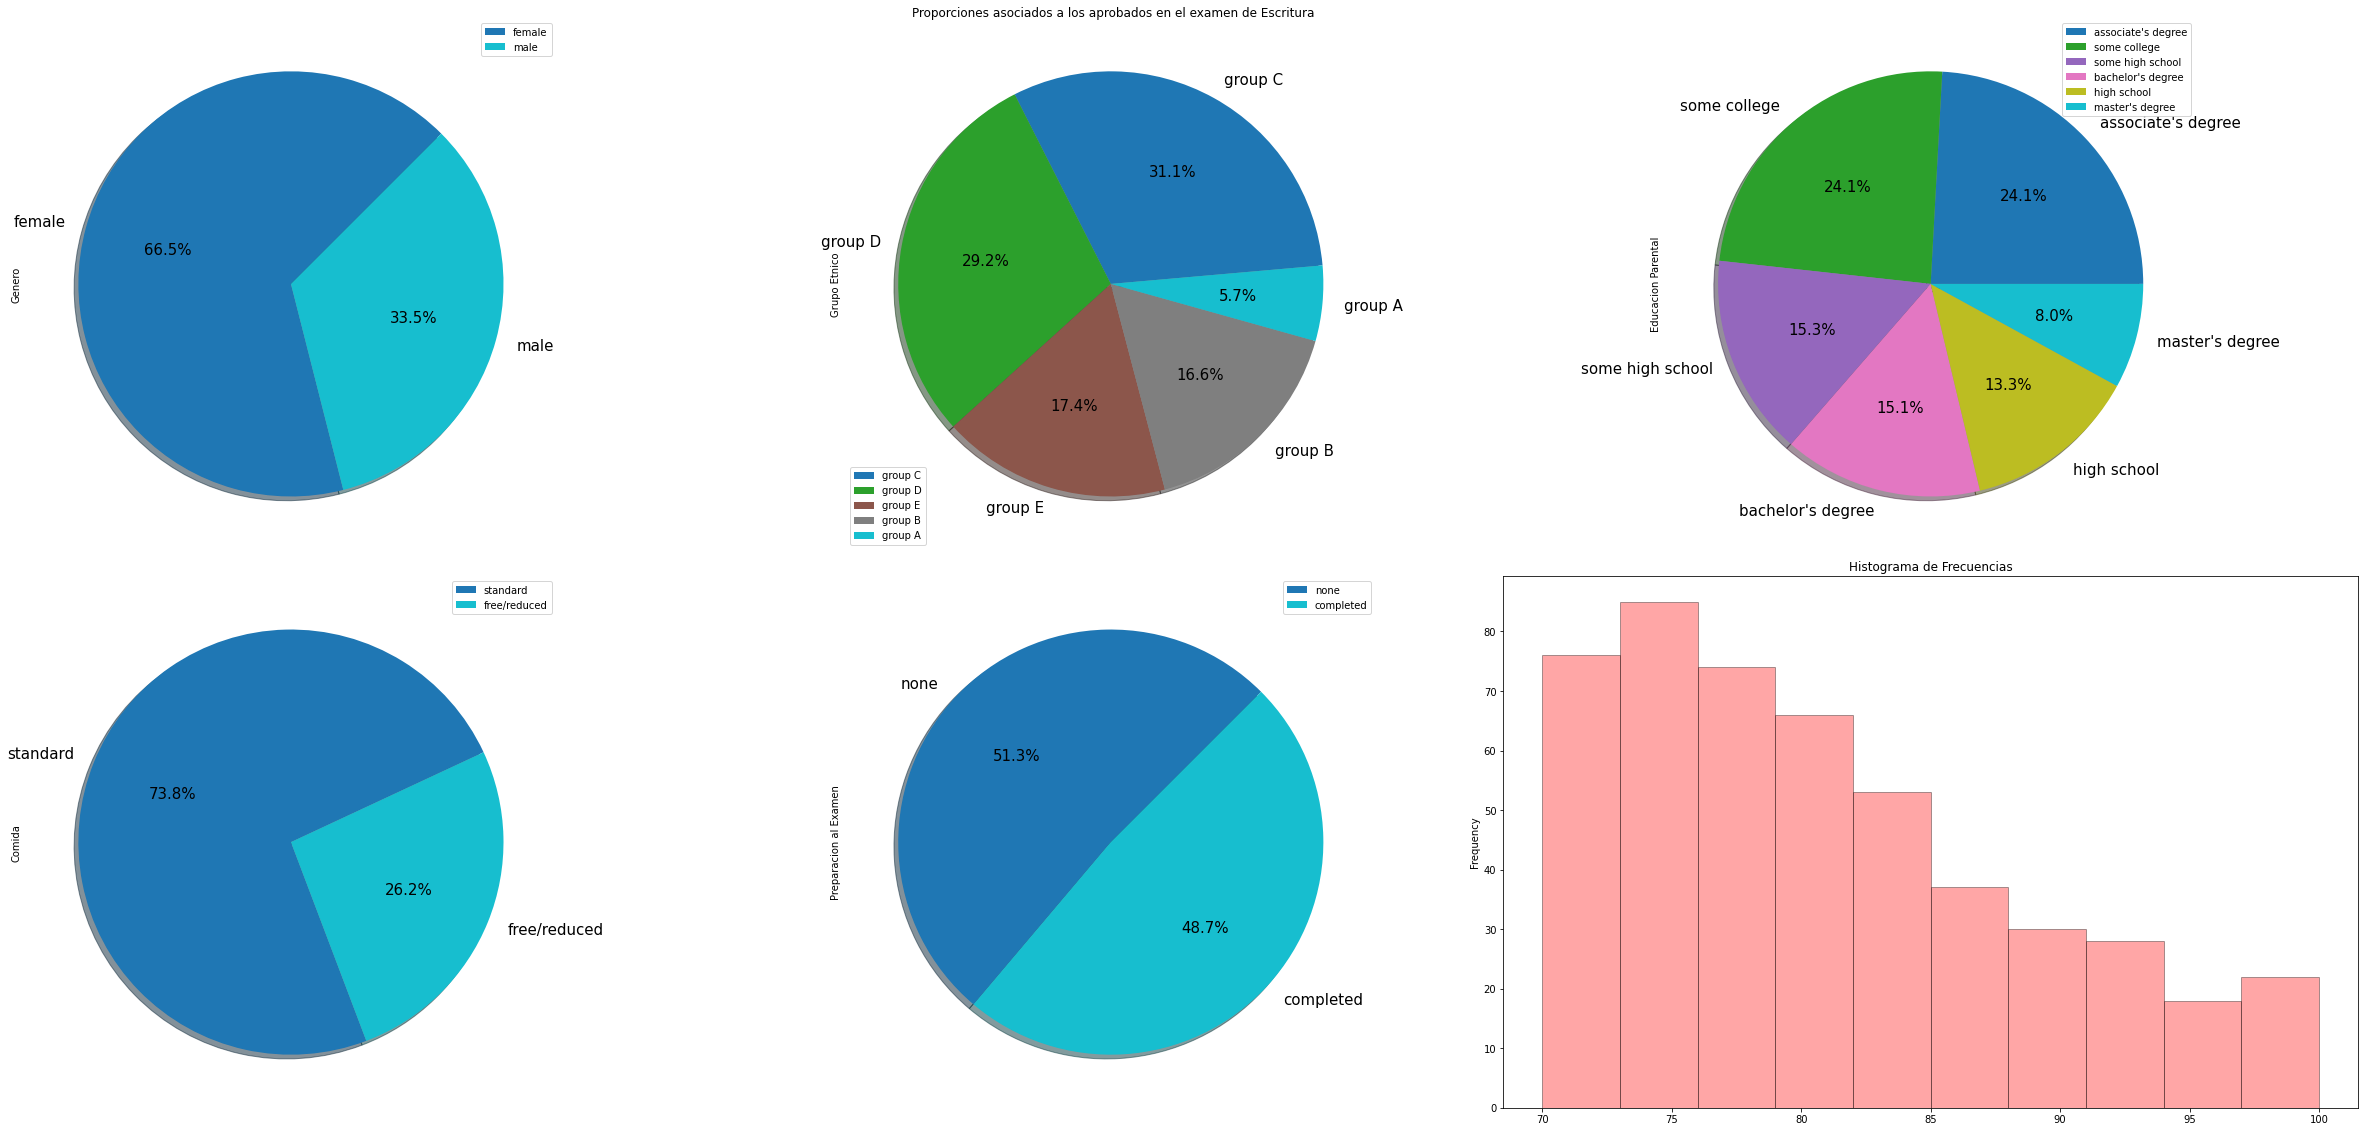

In [27]:
fig, axes2 = plt.subplots(nrows=2, ncols=3,figsize = (35,16))
Escritura_Aprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'tab10',
                                                                   fontsize = 15,
                                                                     ax=axes2[0,0])
Escritura_Aprobados.loc[:,'Grupo Etnico'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 5,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'tab10',
                                                                     fontsize = 15,
                                                                     ax=axes2[0,1])
Escritura_Aprobados.loc[:,'Educacion Parental'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 0,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'tab10',
                                                                     fontsize = 15,
                                                                     ax=axes2[0,2])
Escritura_Aprobados.loc[:,'Comida'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 25,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'tab10',
                                                                   fontsize = 15,
                                                                     ax=axes2[1,0])
Escritura_Aprobados.loc[:,'Preparacion al Examen'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     title = 'Proporciones asociados a los aprobados en el examen de Escritura',
                                                                     colormap = 'tab10',
                                                                     fontsize = 15,
                                                                     ax=axes2[1,1])
Escritura_Aprobados.loc[:,'Puntaje Escritura'].plot(kind = 'hist',edgecolor = 'black',color = 'red',alpha = 0.35,title = 'Histograma de Frecuencias',
                                                        ax = axes2[1,2])

plt.tight_layout()

Graficamos las proporciones asociadas al examen de Lectura

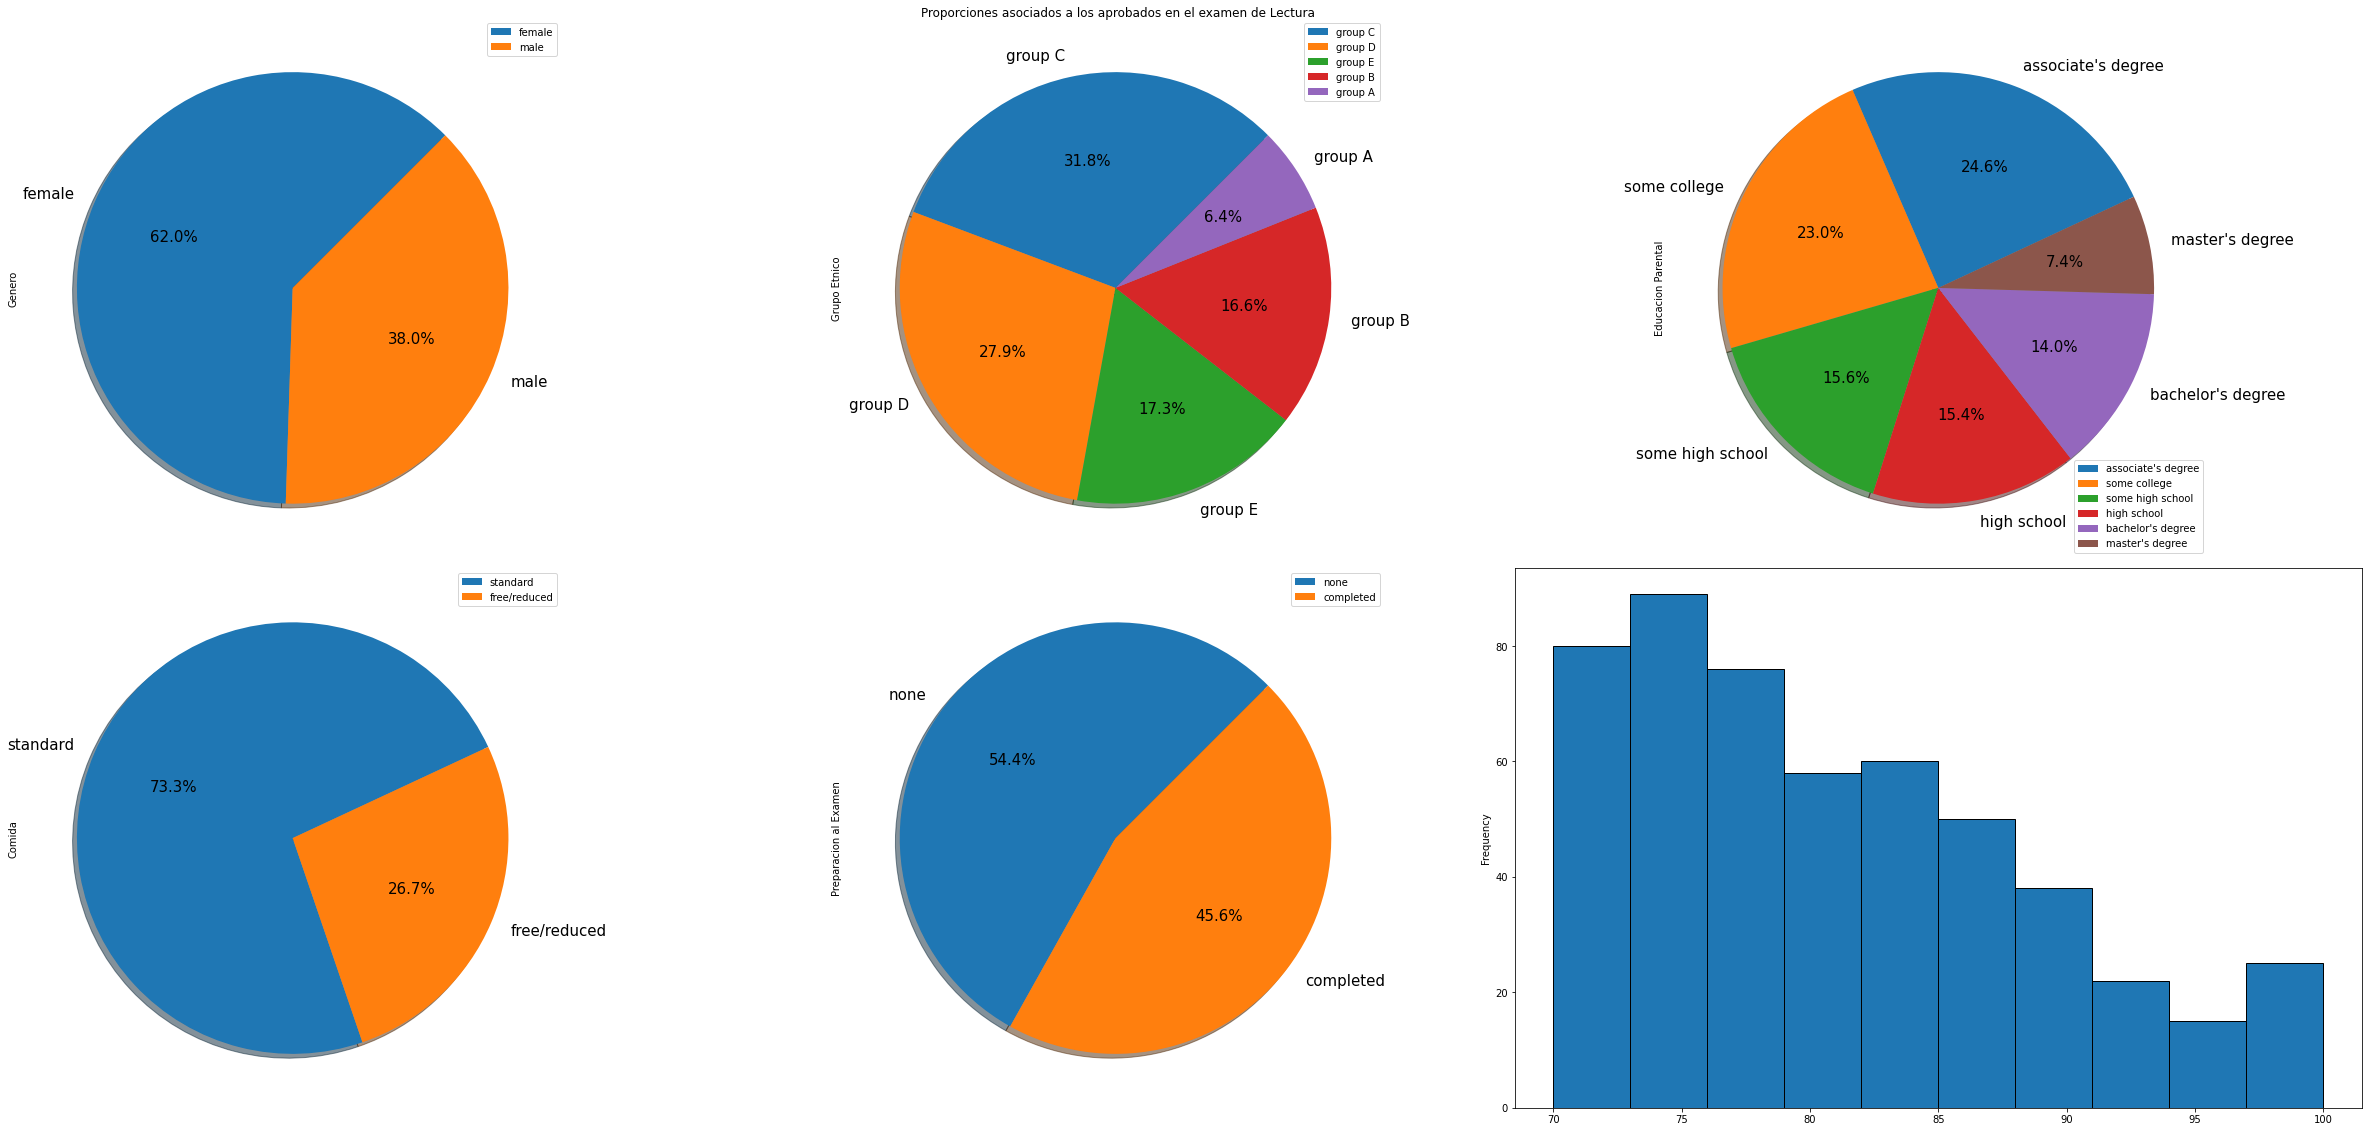

In [28]:
fig, axes3 = plt.subplots(nrows=2, ncols=3,figsize = (35,16))
Lectura_Aprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                 fontsize = 15,
                                                                     ax=axes3[0,0])
Lectura_Aprobados.loc[:,'Grupo Etnico'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     fontsize = 15,
                                                                     ax=axes3[0,1])
Lectura_Aprobados.loc[:,'Educacion Parental'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 25,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     fontsize = 15,
                                                                     ax=axes3[0,2])
Lectura_Aprobados.loc[:,'Comida'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 25,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                 fontsize = 15,
                                                                     ax=axes3[1,0])
Lectura_Aprobados.loc[:,'Preparacion al Examen'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     fontsize = 15,
                                                                     title = 'Proporciones asociados a los aprobados en el examen de Lectura',
                                                                     ax=axes3[1,1])
Lectura_Aprobados.loc[:,'Puntaje Lectura'].plot(kind = 'hist',edgecolor = 'black',
                                                        ax = axes3[1,2])

plt.tight_layout()

Realizamos un análisis análogo pero ahora considerando las calificaciones reprobatorias de cada examen.

Asignaremos a la variable 'Matematicas_Reprobados' aquellos estudiantes que tuvieron una calificacion aprobatoria, usando la misma lógica crearemos la variable 'Escritura_Reprobados' y 'Lectura_Reprobados'.

In [29]:
Matematicas_Reprobados = Data.loc[ Data.loc[:,'Puntaje Matematicas'] < 70]
Escritura_Reprobados = Data.loc[ Data.loc[:,'Puntaje Escritura'] < 70]
Lectura_Reprobados = Data.loc[ Data.loc[:,'Puntaje Lectura'] < 70]

Graficamos las proporciones asociadas a los alumnos reprobados en el examen de Matemáticas

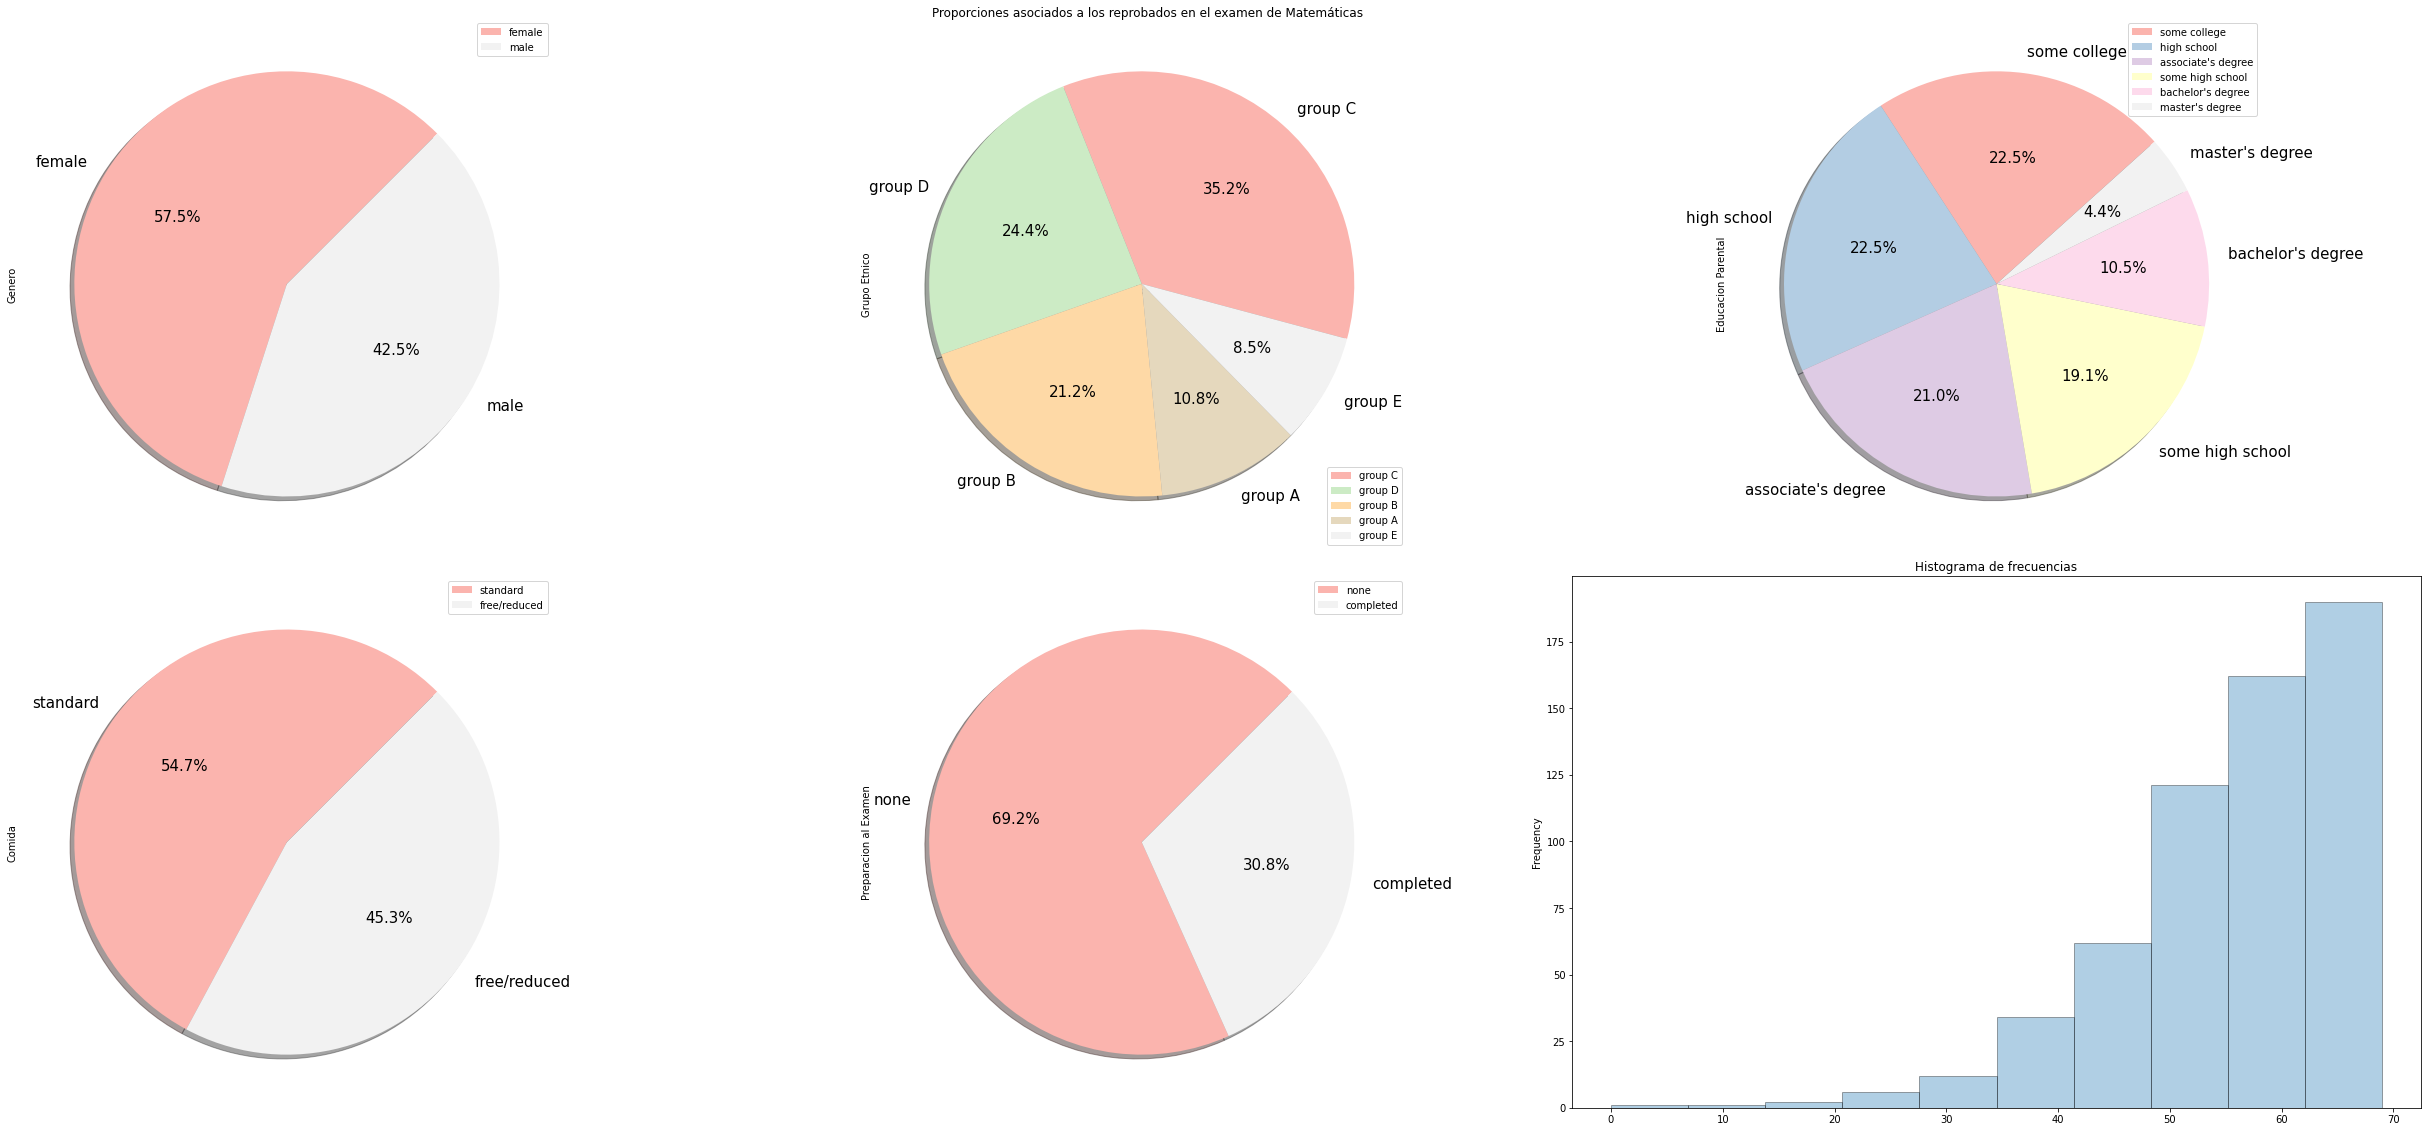

In [30]:
fig, axes4 = plt.subplots(nrows=2, ncols=3,figsize = (36,16))
Matematicas_Reprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'Pastel1',
                                                                      fontsize = 15,
                                                                     ax=axes4[0,0])
Matematicas_Reprobados.loc[:,'Grupo Etnico'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = -15,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'Pastel1',
                                                                     fontsize = 15,
                                                                     ax=axes4[0,1])
Matematicas_Reprobados.loc[:,'Educacion Parental'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 42,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'Pastel1',
                                                                     fontsize = 15,
                                                                     ax=axes4[0,2])
Matematicas_Reprobados.loc[:,'Comida'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                      colormap = 'Pastel1',
                                                                      fontsize = 15,
                                                                     ax=axes4[1,0])
Matematicas_Reprobados.loc[:,'Preparacion al Examen'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     title = 'Proporciones asociados a los reprobados en el examen de Matemáticas',
                                                                     fontsize = 15,
                                                                     colormap = 'Pastel1',
                                                                     ax=axes4[1,1])
Matematicas_Reprobados.loc[:,'Puntaje Matematicas'].plot(kind = 'hist',edgecolor = 'black',alpha = 0.35,title = 'Histograma de frecuencias',
                                                        ax = axes4[1,2])

plt.tight_layout()

Graficamos las proporciones asociadas a los alumnos reprobados en el examen de Escritura

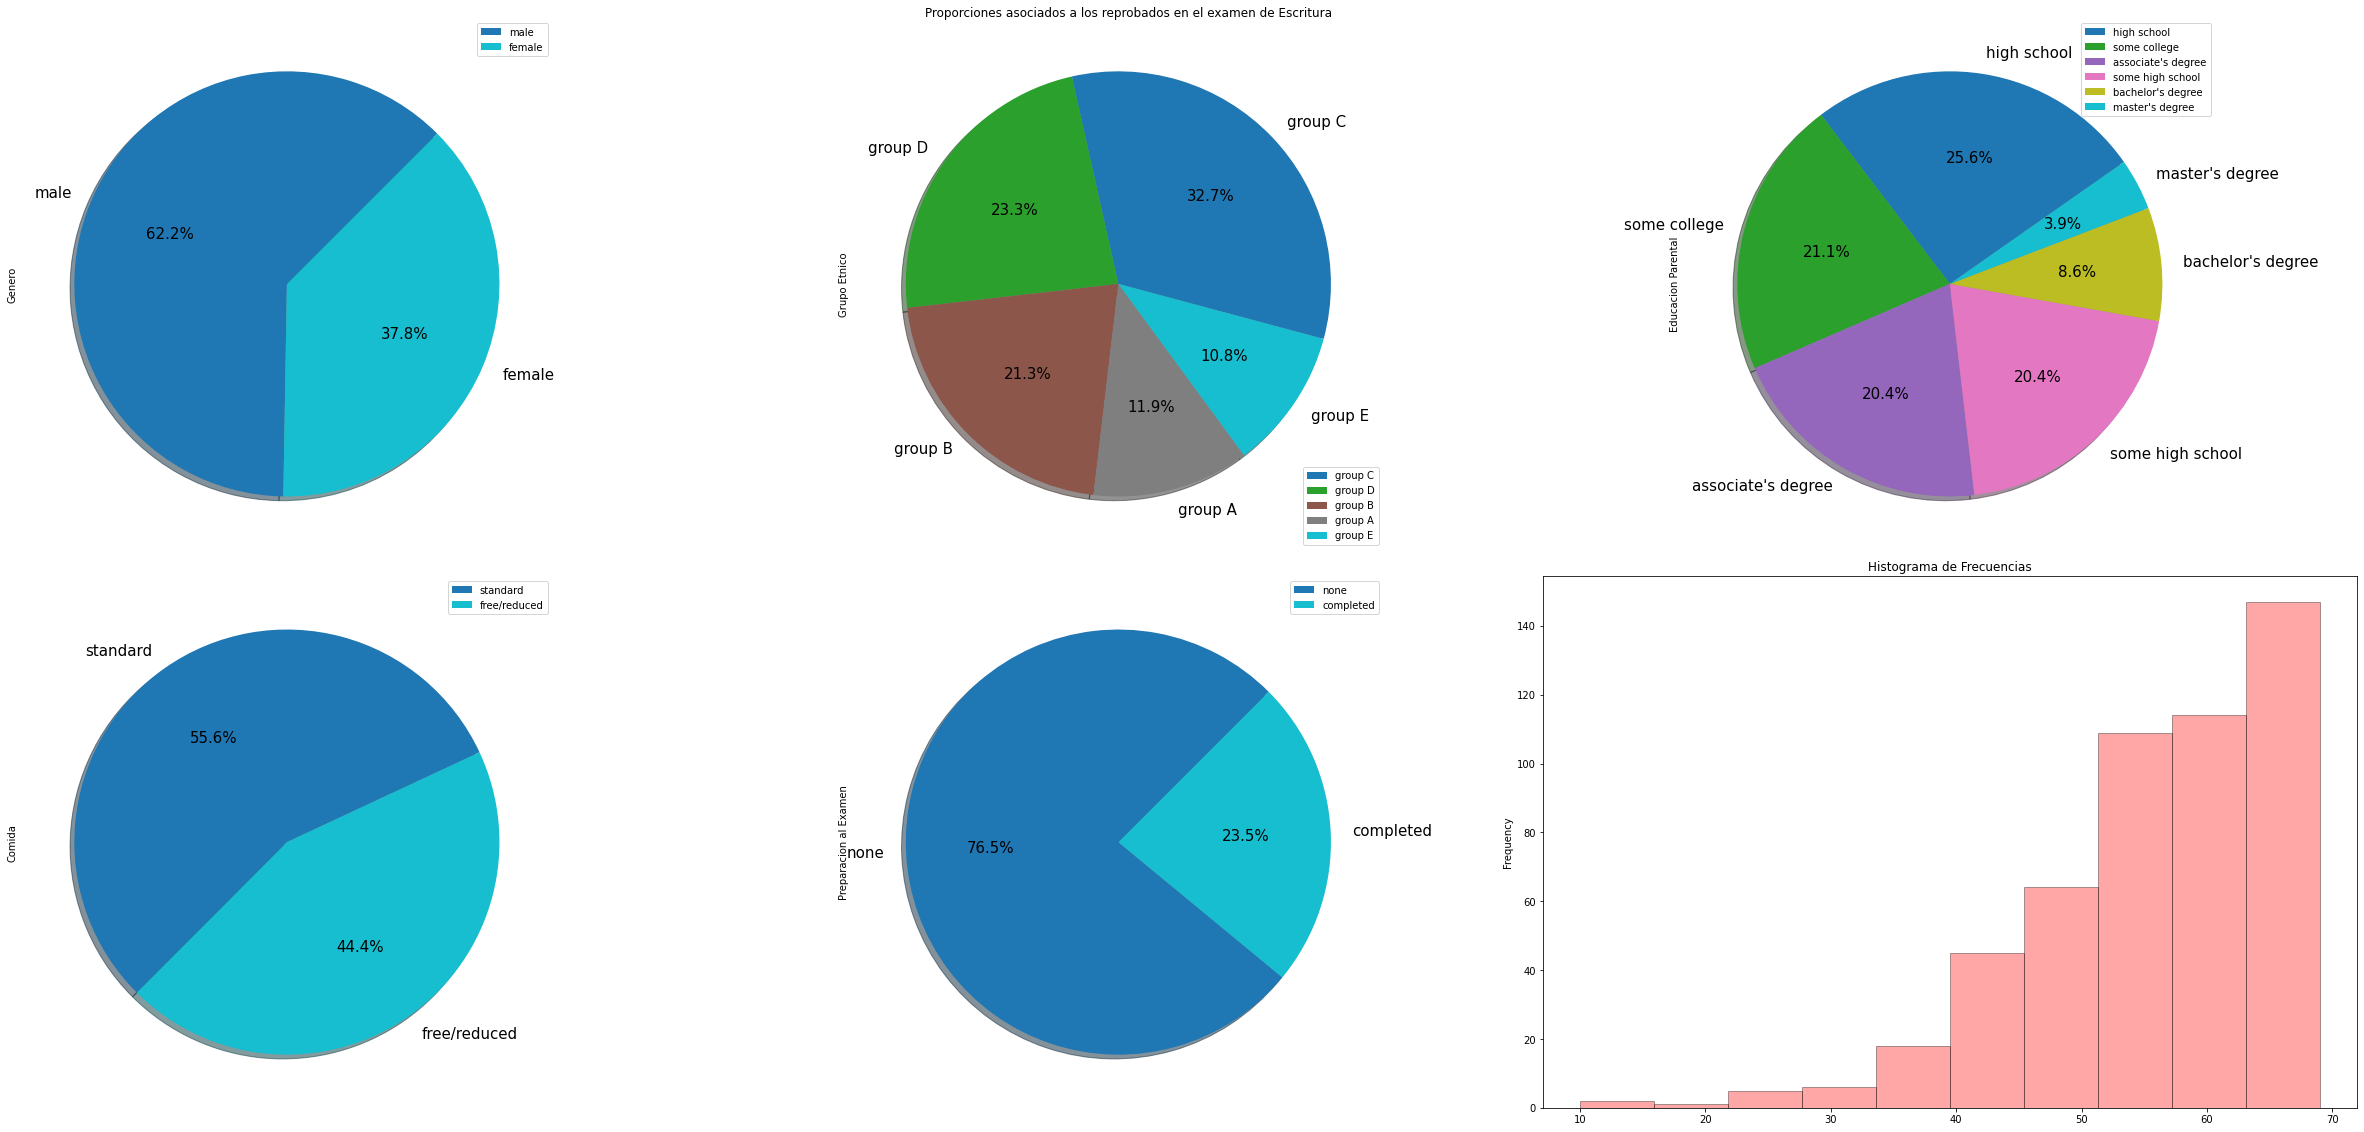

In [31]:
fig, axes5 = plt.subplots(nrows=2, ncols=3,figsize = (35,16))
Escritura_Reprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'tab10',
                                                                    fontsize = 15,
                                                                     ax=axes5[0,0])
Escritura_Reprobados.loc[:,'Grupo Etnico'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = -15,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'tab10',
                                                                     fontsize = 15,
                                                                     ax=axes5[0,1])
Escritura_Reprobados.loc[:,'Educacion Parental'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 35,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     colormap = 'tab10',
                                                                     fontsize = 15,
                                                                     ax=axes5[0,2])
Escritura_Reprobados.loc[:,'Comida'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 25,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                    colormap = 'tab10',
                                                                    fontsize = 15,
                                                                     ax=axes5[1,0])
Escritura_Reprobados.loc[:,'Preparacion al Examen'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     title = 'Proporciones asociados a los reprobados en el examen de Escritura',
                                                                     colormap = 'tab10',
                                                                     fontsize = 15,
                                                                     ax=axes5[1,1])
Escritura_Reprobados.loc[:,'Puntaje Escritura'].plot(kind = 'hist',edgecolor = 'black',color = 'red',alpha = 0.35,title = 'Histograma de Frecuencias',
                                                        ax = axes5[1,2])

plt.tight_layout()

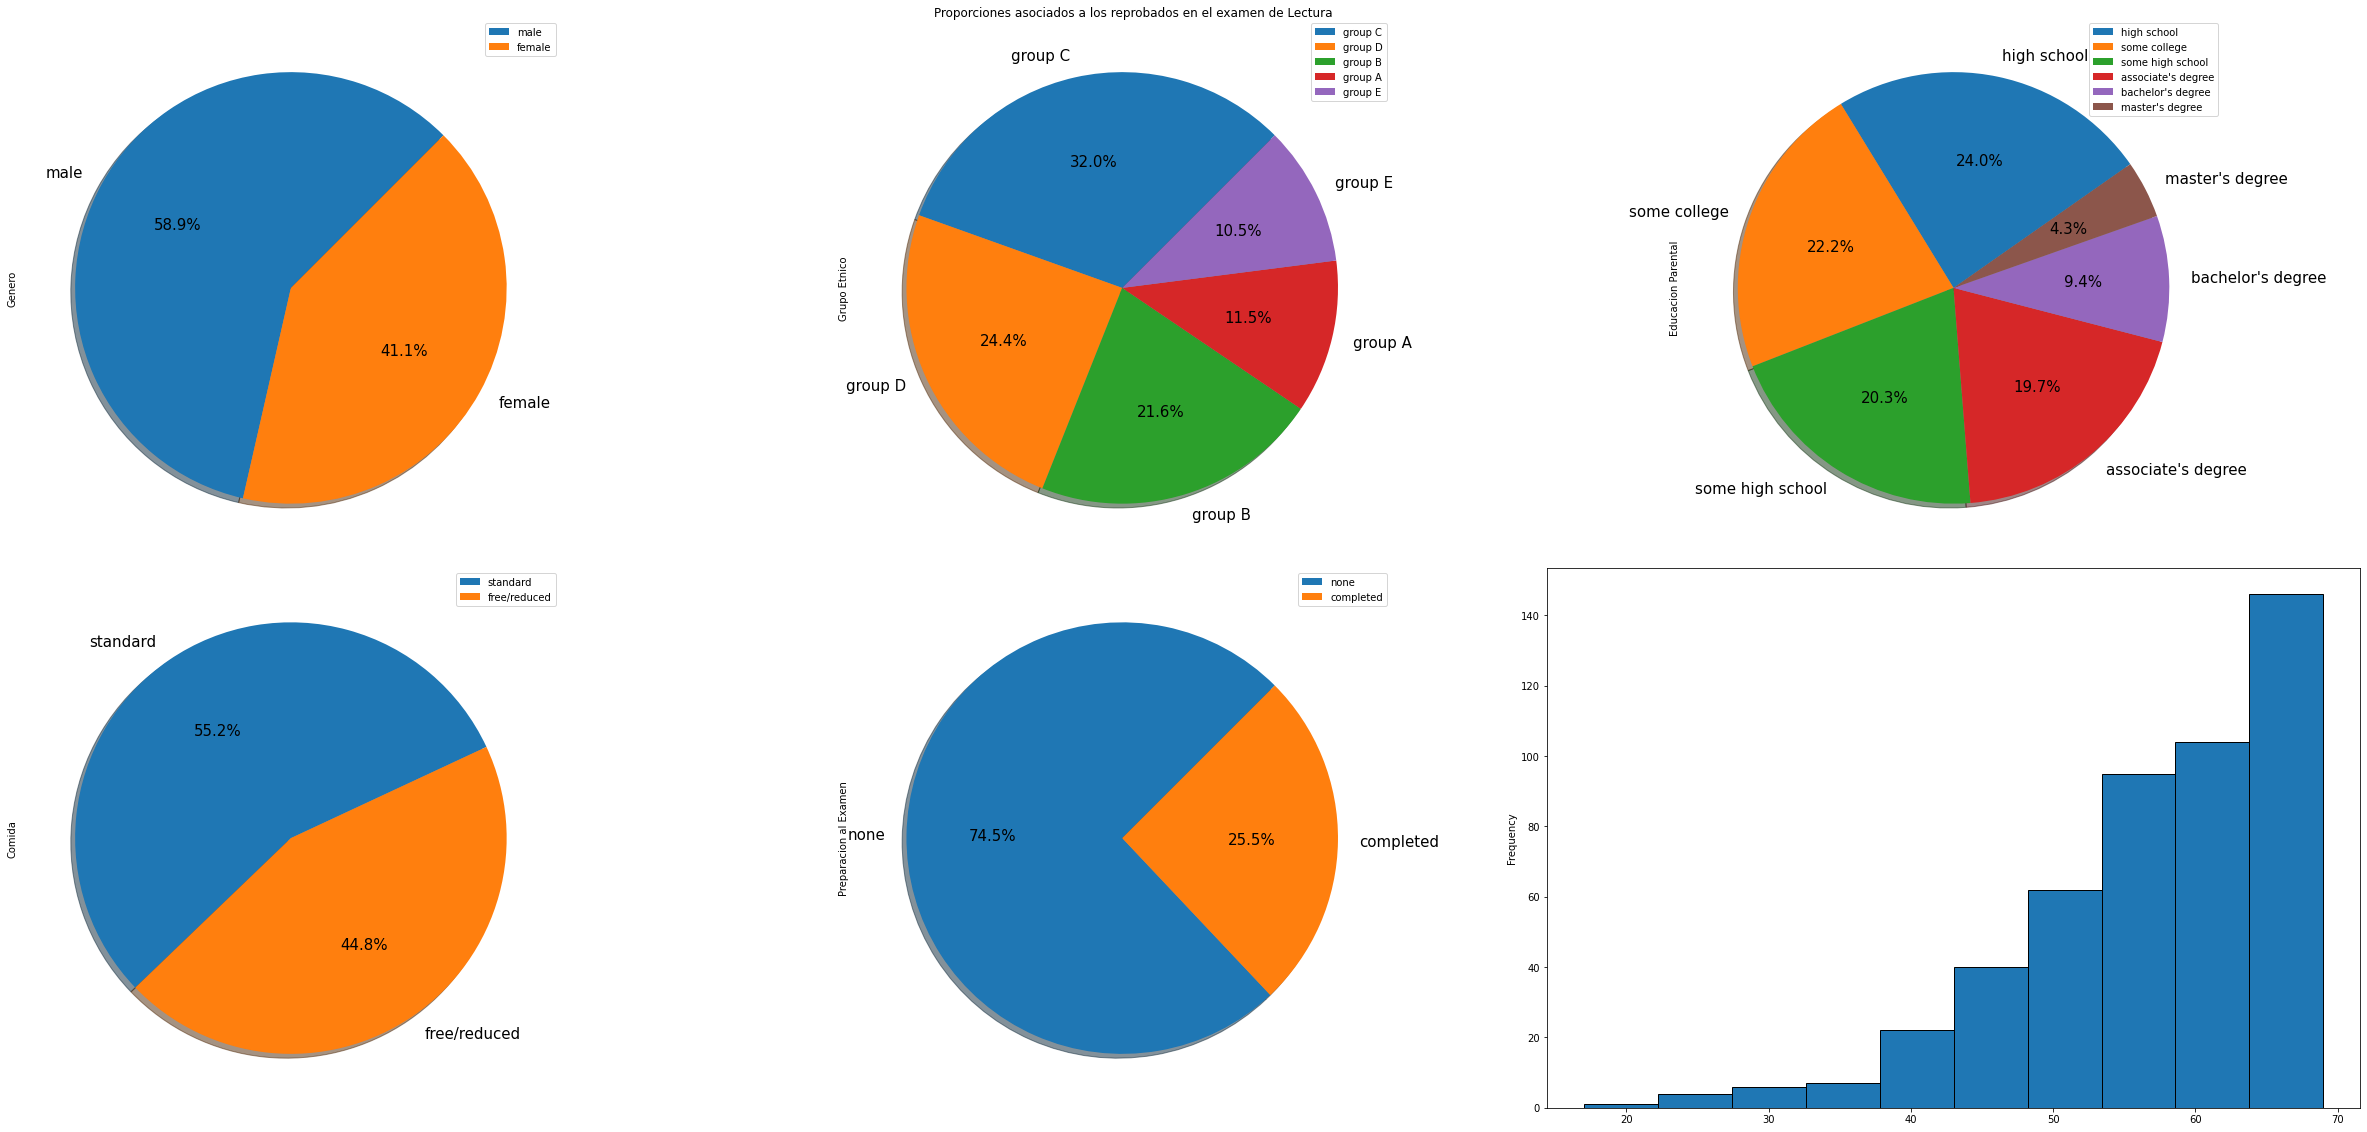

In [32]:
fig, axes6 = plt.subplots(nrows=2, ncols=3,figsize = (35,16))
Lectura_Reprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                  fontsize = 15,
                                                                     ax=axes6[0,0])
Lectura_Reprobados.loc[:,'Grupo Etnico'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     fontsize = 15,
                                                                     ax=axes6[0,1])
Lectura_Reprobados.loc[:,'Educacion Parental'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 35,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     fontsize = 15,
                                                                     ax=axes6[0,2])
Lectura_Reprobados.loc[:,'Comida'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 25,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                  fontsize = 15,
                                                                     ax=axes6[1,0])
Lectura_Reprobados.loc[:,'Preparacion al Examen'].value_counts().to_frame().plot(kind = 'pie',
                                                                     startangle = 45,
                                                                     shadow = True,
                                                                     subplots = True,
                                                                     autopct = '%1.1f%%',
                                                                     title = 'Proporciones asociados a los reprobados en el examen de Lectura',
                                                                     fontsize = 15,
                                                                     ax=axes6[1,1])
Lectura_Reprobados.loc[:,'Puntaje Lectura'].plot(kind = 'hist',edgecolor = 'black',
                                                        ax = axes6[1,2])

plt.tight_layout()

Con las proporciones dadas podemos realizar ciertas comparaciones interesantes, por ejemplo, la proporción de género respecto a las calificaciones aprobatorias y reprobatorias o la proporción del nivel educativo paternal 

Compararemos las proporciones de género que aprobaron el examen de Matemáticas contra las proporciones de género que reprobaron el examen de Matemáticas

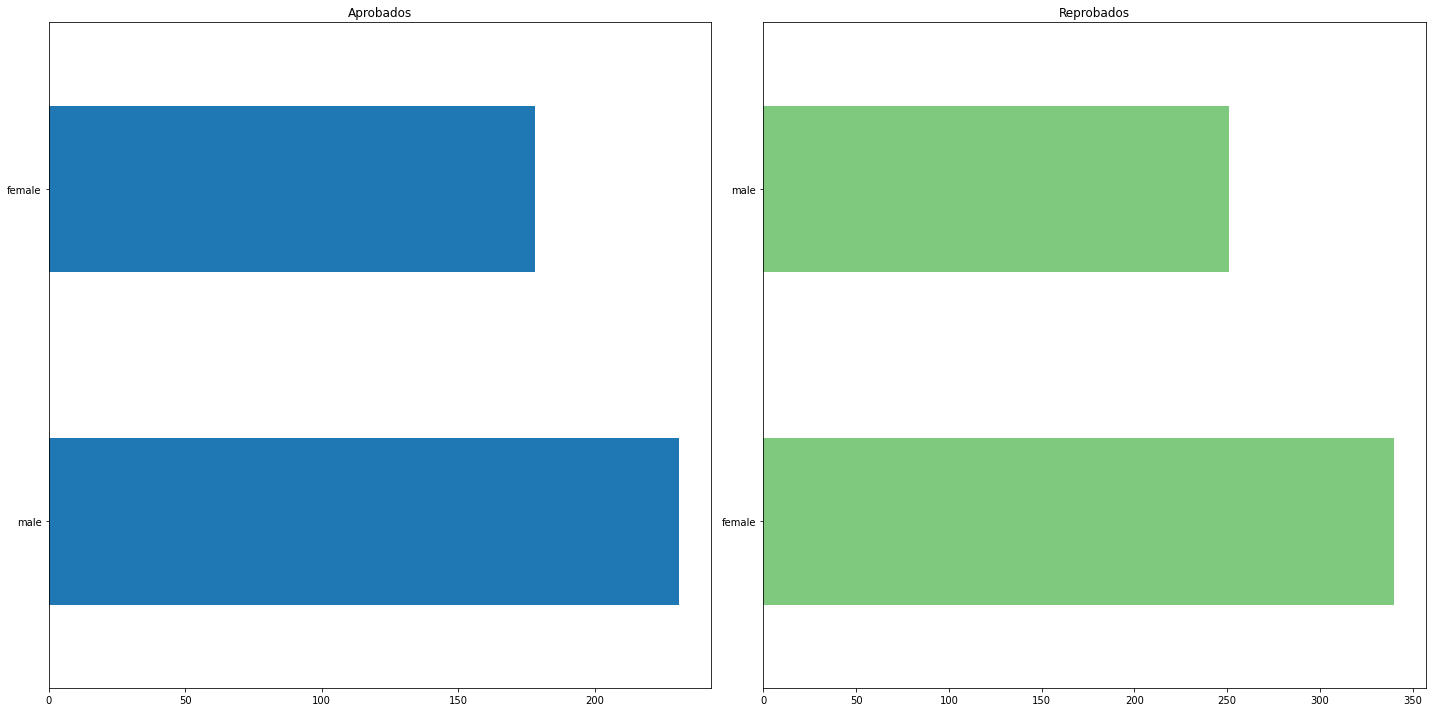

In [33]:
fig, axes7 = plt.subplots(nrows=1, ncols=2,figsize = (20,10))
Matematicas_Aprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'barh',
                                                                     legend = None,
                                                                     title = 'Aprobados',
                                                                     ax=axes7[0])
Matematicas_Reprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'barh',
                                                                      legend = None,
                                                                      title = 'Reprobados',
                                                                      colormap = 'Accent',
                                                                     ax=axes7[1])
plt.tight_layout()

Podemos notar que la proporción de hombres que aprobaron el examen de Matemáticas es mayor a la proporción de mujeres que aprobaron el examen de Matemáticas, sin embargo en la sección de reprobados podemos visualizar que la proporción de mujeres es mayor a la de los hombres, es decir, más mujeres que hombres reprobaron el examen de matemáticas y más hombres que mujeres aprobaron el examen de matemáticas.

Vamos ahora a analizar esta proporción pero aplicado al examen de Lectura

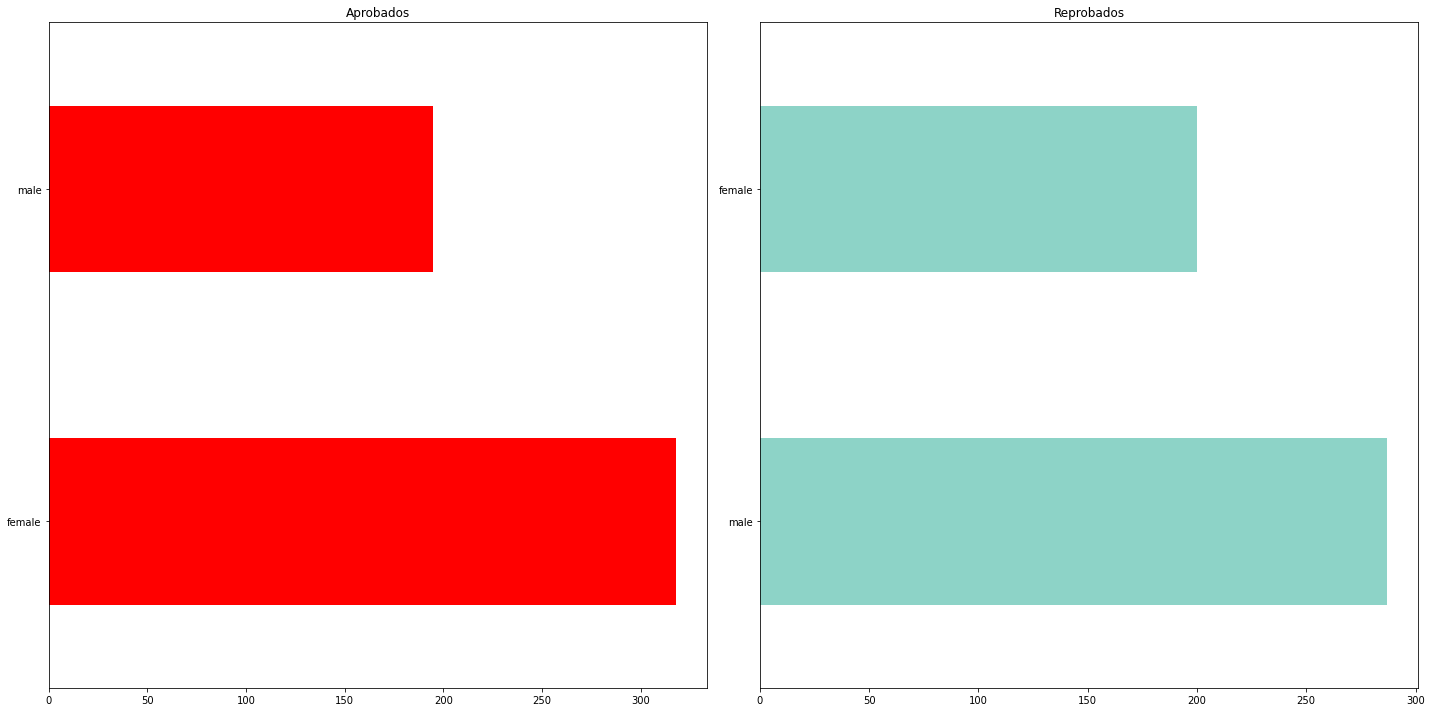

In [34]:
fig, axes8 = plt.subplots(nrows=1, ncols=2,figsize = (20,10))
Lectura_Aprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'barh',
                                                                     legend = None,
                                                                     title = 'Aprobados',
                                                                     colormap = 'hsv',
                                                                     ax=axes8[0])
Lectura_Reprobados.loc[:,'Genero'].value_counts().to_frame().plot(kind = 'barh',
                                                                      legend = None,
                                                                      title = 'Reprobados',
                                                                      colormap = 'Set3',
                                                                     ax=axes8[1])
plt.tight_layout()

Caso contrario al examen de matemáticas notemos que en el examen de lectura la proporción de mujeres que aprobaron el examen es mayor al de los hombres y la proporción de hombres que reprobaron el examen es mayor al de las mujeres que reprobaron el examen.

Analizaremos ahora la calidad de las relaciones lineales que hay entre los indicadores y los puntajes de los examenes.

Recordemos que anteriormente habíamos calculado la correlación entre las variables mediante el método Spearman.

In [35]:
Data2Corr = Data2.corr(method='spearman')
Data2Corr

,Mujer,Hombre,Grupo Etnico A,Grupo Etnico B,Grupo Etnico C,Grupo Etnico D,Grupo Etnico E,Educacion Parental - Grado Asociado,Educacion Parental - Universitario,Educacion Parental - Preparatoria,Educacion Parental - Maestria,Educacion Parental - Colegio Asociado,Educacion Parental - Preparatoria Asociada,Comida - Incompleta,Comida - Completa,Curso Preparacion - Completo,Curso Preparacion - Incompleto,Puntaje Matematicas,Puntaje Lectura,Puntaje Escritura
Mujer,1.000000,-1.000000,-0.071001,0.028466,0.063368,-0.030566,-0.020302,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028,-0.159972,0.247349,0.312862
Hombre,-1.000000,1.000000,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028,0.159972,-0.247349,-0.312862
Grupo Etnico A,-0.071001,0.071001,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315,-0.103347,-0.098700,-0.113470
Grupo Etnico B,0.028466,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106,-0.079292,-0.054390,-0.067699
Grupo Etnico C,0.063368,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522,-0.076165,0.001896,-0.012206
Grupo Etnico D,-0.030566,0.030566,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956,0.057030,0.027256,0.077193
Grupo Etnico E,-0.020302,0.020302,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,-0.052398,0.052398,0.059393,-0.059393,0.204493,0.105400,0.088228
Educacion Parental - Grado Asociado,0.004835,-0.004835,-0.048658,-0.007238,0.037077,-0.044674,0.054922,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.009102,0.009102,0.012668,-0.012668,0.049257,0.060796,0.058019
Educacion Parental - Universitario,0.011638,-0.011638,0.016307,-0.019121,0.015682,-0.020556,0.013221,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,0.013668,-0.013668,0.024285,-0.024285,0.075317,0.083367,0.121815
Educacion Parental - Preparatoria,-0.037952,0.037952,0.004919,0.069093,0.007977,-0.042118,-0.039494,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,0.002211,-0.002211,-0.074446,0.074446,-0.123315,-0.148424,-0.183238


Analicemos esta tabla mediante un mapa de calor

<AxesSubplot:>

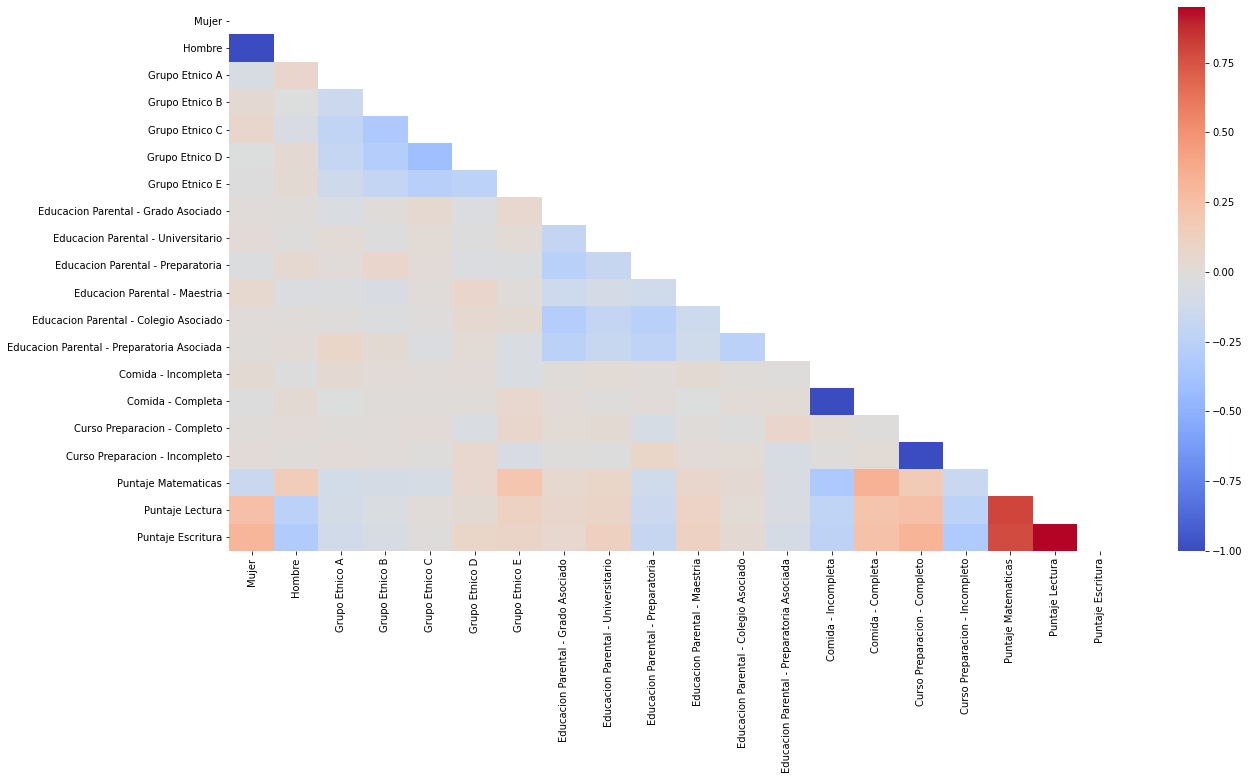

In [36]:
mask = np.triu(np.ones_like(Data2Corr,dtype = bool))
plt.figure(figsize = (20,10))
sns.heatmap(Data2Corr,
            mask = mask,
            xticklabels = Data2Corr.columns,
            yticklabels = Data2Corr.columns,
            cmap = 'coolwarm')

Enfocandonos solamente en los puntajes de los examenes notemos que existe una correlación lineal fuerte entre los mismos puntajes de los examenes pero no con las demás variables, incluso negativa, por tanto nos dedicaremos a evaluar estos puntos en un ANOVA para determinar si estadísticamente existe una relación lineal entre las variables y, en caso de que exista, dibujar su gráfica de dispersión con un intervalo de confianza del $95\%$ así como su respectiva ecuación.

Realizaremos un estudio de ANOVA entre el puntaje de matemáticas y el puntaje de escritura. Tenemos las siguientes hipótesis.

$$H_0 : \beta_1 = 0$$

$$H_1 : \beta_1 \neq 0$$

Asignamos a la variable 'D_M_E' las columnas de la variable 'Data' correspondientes a matemáticas y escritura y modificamos los nombres a 'Puntaje_Matematicas' y 'Puntaje_Escritura'

In [37]:
D_M_E = Data.loc[:,['Puntaje Matematicas','Puntaje Escritura']]
D_M_E.columns = ['Puntaje_Matematicas','Puntaje_Escritura']

In [38]:
anova_lm(ols(formula='Puntaje_Matematicas ~ Puntaje_Escritura',data = D_M_E).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Puntaje_Escritura,1.0,147973.572445,147973.572445,1807.216666,3.376027e-226
Residual,998.0,81715.506555,81.879265,NaN,NaN


Comparamos el valor $F$ conseguido con el valor crítico

In [39]:
from scipy.stats import f as Valor_Critico_F
if anova_lm(ols(formula='Puntaje_Matematicas ~ Puntaje_Escritura',data = D_M_E).fit()).loc['Puntaje_Escritura','F'] > Valor_Critico_F.isf(0.05,1,len(D_M_E.index)-2):
  print('Rechazamos la hipótesis nula')

Rechazamos la hipótesis nula


Como rechazamos la hipótesis nula entonces podemos decir que $\beta_1 \neq 0$, es decir, existe una asociación lineal entre el puntaje de matemáticas y escritura.

Obtenemos los coeficientes de la recta de regresión ajustada a los datos

In [40]:
LR_D_M_E = LinearRegression()
LR_D_M_E.fit(D_M_E[['Puntaje_Escritura']],D_M_E[['Puntaje_Matematicas']])
print('La pendiente es',float(LR_D_M_E.coef_),'\nLa interseccion es',float(LR_D_M_E.intercept_))

La pendiente es 0.8009213173511417 
La interseccion es 11.583100668985402


Por lo tanto tenemos que la recta de regresión ajustada a los datos es

$$\hat{y} = 0.801\cdot x + 11.583$$

Dibujamos la gráfica de dispersión de la recta anterior mencionada

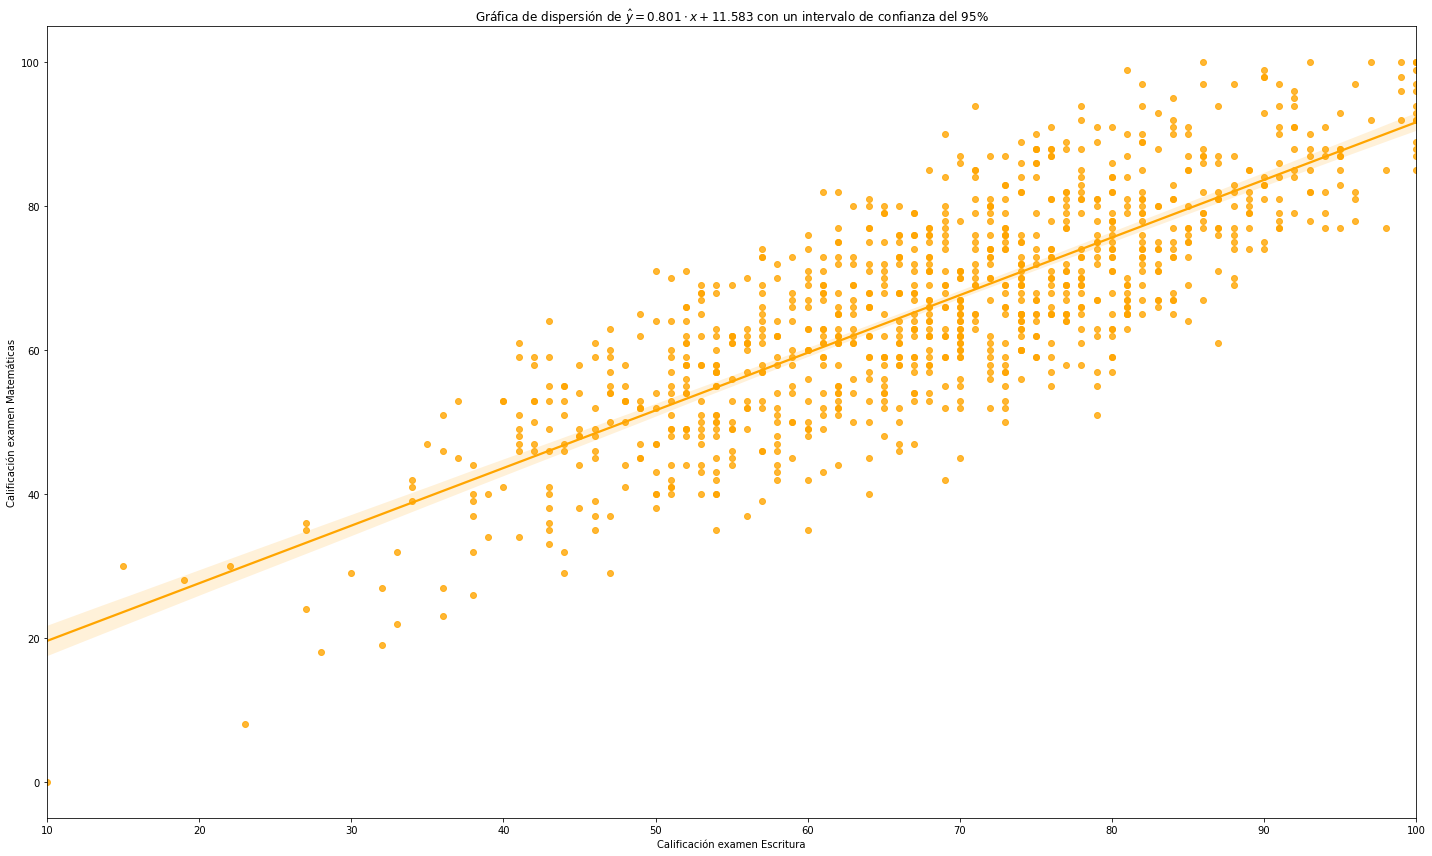

In [41]:
plt.figure(figsize = (20,12))
plot1 = sns.regplot(x = 'Puntaje_Escritura', y = 'Puntaje_Matematicas', data = D_M_E, ci = 95, color = 'orange')
plot1.set(xlabel = 'Calificación examen Escritura',ylabel = 'Calificación examen Matemáticas') #Titulo de ejes
plot1.set_title('Gráfica de dispersión de '+r'$\hat{y} = 0.801\cdot x + 11.583$'+' con un intervalo de confianza del 95%') #Titulo grafico
plt.tight_layout()

Realizaremos un estudio de ANOVA entre el puntaje de matemáticas y el puntaje de lectura. Tenemos las siguientes hipótesis.

$$H_0 : \beta_1 = 0$$

$$H_1 : \beta_1 \neq 0$$

Asignamos a la variable 'D_M_L' las columnas de la variable 'Data' correspondientes a matemáticas y escritura y modificamos los nombres a 'Puntaje_Matematicas' y 'Puntaje_Lectura'

In [42]:
D_M_L = Data.loc[:,['Puntaje Matematicas','Puntaje Lectura']]
D_M_L.columns = ['Puntaje_Matematicas','Puntaje_Lectura']

In [43]:
anova_lm(ols(formula='Puntaje_Matematicas ~ Puntaje_Lectura',data = D_M_L).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Puntaje_Lectura,1.0,153532.565537,153532.565537,2011.981555,1.787753e-241
Residual,998.0,76156.513463,76.309132,NaN,NaN


Comparamos el valor $F$ conseguido con el valor crítico

In [44]:
if anova_lm(ols(formula='Puntaje_Matematicas ~ Puntaje_Lectura',data = D_M_L).fit()).loc['Puntaje_Lectura','F'] > Valor_Critico_F.isf(0.05,1,len(D_M_L.index)-2):
  print('Rechazamos la hipótesis nula')

Rechazamos la hipótesis nula


Como rechazamos la hipótesis nula entonces podemos decir que $\beta_1 \neq 0$, es decir, existe una asociación lineal entre el puntaje de matemáticas y lectura.

Obtenemos los coeficientes de la recta de regresión ajustada a los datos

In [45]:
LR_D_M_L = LinearRegression()
LR_D_M_L.fit(D_M_L[['Puntaje_Lectura']],D_M_L[['Puntaje_Matematicas']])
print('La pendiente es',float(LR_D_M_L.coef_),'\nLa interseccion es',float(LR_D_M_L.intercept_))

La pendiente es 0.8491002021348064 
La interseccion es 7.357588118537578


Por lo tanto tenemos que la recta de regresión ajustada a los datos es

$$\hat{y} = 0.8491\cdot x + 7.3575$$

Dibujamos la gráfica de dispersión de la recta anterior mencionada

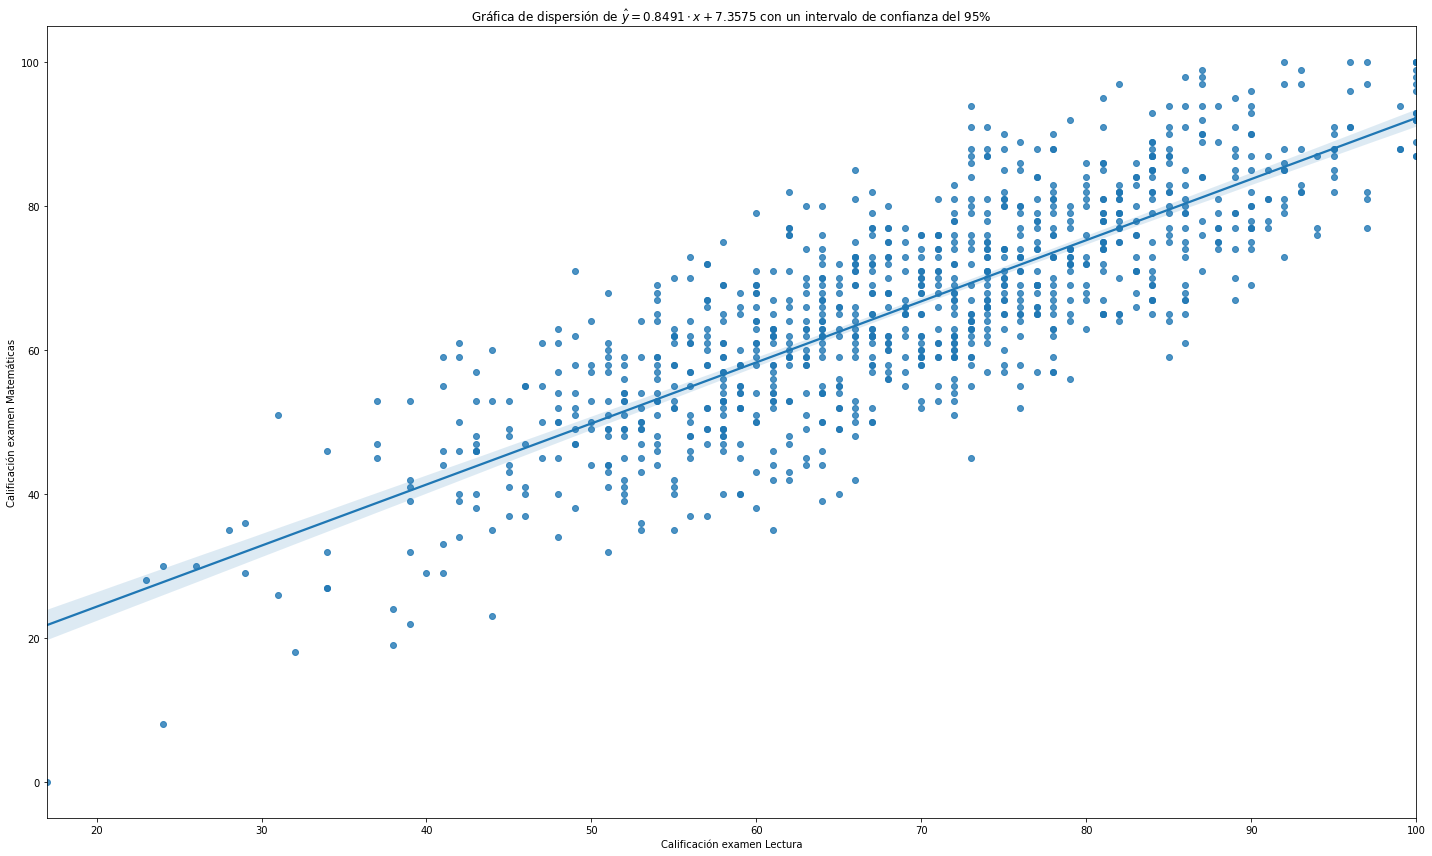

In [46]:
plt.figure(figsize = (20,12))
plot2 = sns.regplot(x = 'Puntaje_Lectura', y = 'Puntaje_Matematicas', data = D_M_L, ci = 95)
plot2.set(xlabel = 'Calificación examen Lectura',ylabel = 'Calificación examen Matemáticas') #Titulo de ejes
plot2.set_title('Gráfica de dispersión de '+r'$\hat{y} = 0.8491\cdot x + 7.3575$'+' con un intervalo de confianza del 95%') #Titulo grafico
plt.tight_layout()

Realizaremos un estudio de ANOVA entre el puntaje de escritura y el puntaje de lectura. Tenemos las siguientes hipótesis.

$$H_0 : \beta_1 = 0$$

$$H_1 : \beta_1 \neq 0$$

Asignamos a la variable 'D_E_L' las columnas de la variable 'Data' correspondientes a lectura y escritura y modificamos los nombres a 'Puntaje_Lectura' y 'Puntaje_Escritura'

In [47]:
D_E_L = Data.loc[:,['Puntaje Escritura','Puntaje Lectura']]
D_E_L.columns = ['Puntaje_Escritura','Puntaje_Lectura']

In [48]:
anova_lm(ols(formula='Puntaje_Escritura ~ Puntaje_Lectura',data = D_E_L).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Puntaje_Lectura,1.0,210206.220311,210206.220311,10248.019383,0.0
Residual,998.0,20470.863689,20.511887,NaN,NaN


Comparamos el valor de $F$ conseguido con el valor crítico

In [49]:
if anova_lm(ols(formula='Puntaje_Escritura ~ Puntaje_Lectura',data = D_E_L).fit()).loc['Puntaje_Lectura','F'] > Valor_Critico_F.isf(0.05,1,len(D_E_L.index)-2):
  print('Rechazamos la hipótesis nula')

Rechazamos la hipótesis nula


Como rechazamos la hipótesis nula entonces podemos decir que $\beta_1 \neq 0$, es decir, existe una asociación lineal entre el puntaje de escritura y lectura.

Obtenemos los coeficientes de la recta de regresión ajustada a los datos

In [50]:
LR_D_E_L = LinearRegression()
LR_D_E_L.fit(D_E_L[['Puntaje_Lectura']],D_E_L[['Puntaje_Escritura']])
print('La pendiente es',float(LR_D_E_L.coef_),'\nLa interseccion es',float(LR_D_E_L.intercept_))

La pendiente es 0.99353111424096 
La interseccion es -0.667553640932951


Por lo tanto tenemos que la recta de regresión ajustada a los datos es

$$\hat{y} = 0.9935\cdot x -0.6675$$

Dibujamos la gráfica de dispersión de la ecuación anterior mencionada


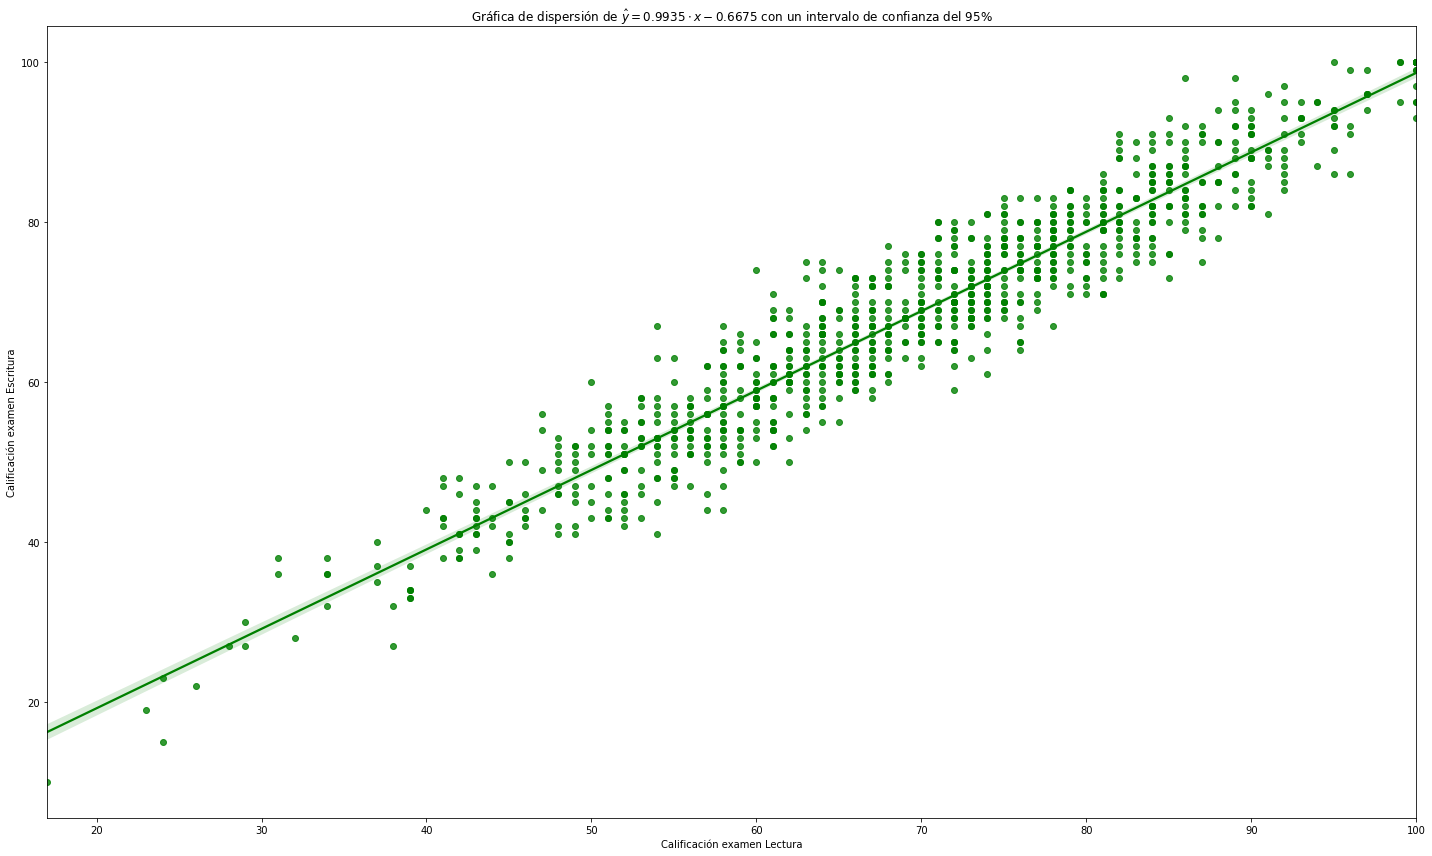

In [51]:
plt.figure(figsize = (20,12))
plot3 = sns.regplot(x = 'Puntaje_Lectura', y = 'Puntaje_Escritura', data = D_E_L, ci = 95,color = 'green')
plot3.set(xlabel = 'Calificación examen Lectura',ylabel = 'Calificación examen Escritura') #Titulo de ejes
plot3.set_title('Gráfica de dispersión de '+r'$\hat{y} = 0.9935\cdot x -0.6675$'+' con un intervalo de confianza del 95%') #Titulo grafico
plt.tight_layout()

Así podamos estimar que cuando los estudiantes saquen una calificación de 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 en el examen de Lectura esperaríamos una calificación en el examen de Escritura :

In [52]:
for Cal in [10,20,30,40,50,60,70,80,90,100]:
  print('Calificacion examen Lectura',Cal,'y Calificacion examen estimada Escritura',0.99353111424096*Cal-0.667553640932951)

Calificacion examen Lectura 10 y Calificacion examen estimada Escritura 9.267757501476648
Calificacion examen Lectura 20 y Calificacion examen estimada Escritura 19.203068643886247
Calificacion examen Lectura 30 y Calificacion examen estimada Escritura 29.138379786295847
Calificacion examen Lectura 40 y Calificacion examen estimada Escritura 39.073690928705446
Calificacion examen Lectura 50 y Calificacion examen estimada Escritura 49.00900207111505
Calificacion examen Lectura 60 y Calificacion examen estimada Escritura 58.944313213524644
Calificacion examen Lectura 70 y Calificacion examen estimada Escritura 68.87962435593424
Calificacion examen Lectura 80 y Calificacion examen estimada Escritura 78.81493549834384
Calificacion examen Lectura 90 y Calificacion examen estimada Escritura 88.75024664075345
Calificacion examen Lectura 100 y Calificacion examen estimada Escritura 98.68555778316305


Realizamos un clustering del gráfico anterior pues observamos, en el mapa de calor y gráficamente, que de los puntajes relacionados con otras variables la relación examen lectura y examen escritura es la más fuerte entre las demás, habland linealmente.

La agrupación sería en 3 pues contamos con una enumeración del 0 al 100 y así podríamos observar 3 grupos de estudio.

Empezamos la agrupación de los datos a estudiar

In [53]:
x_valores = Data['Puntaje Lectura'].values
y_valores = Data['Puntaje Escritura'].values

Creamos una matriz

In [54]:
X = np.array(list(zip(x_valores,y_valores)))

Creamos las 3 agrupaciones con KMeans

In [55]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
colors = ['m.','r.','c.']

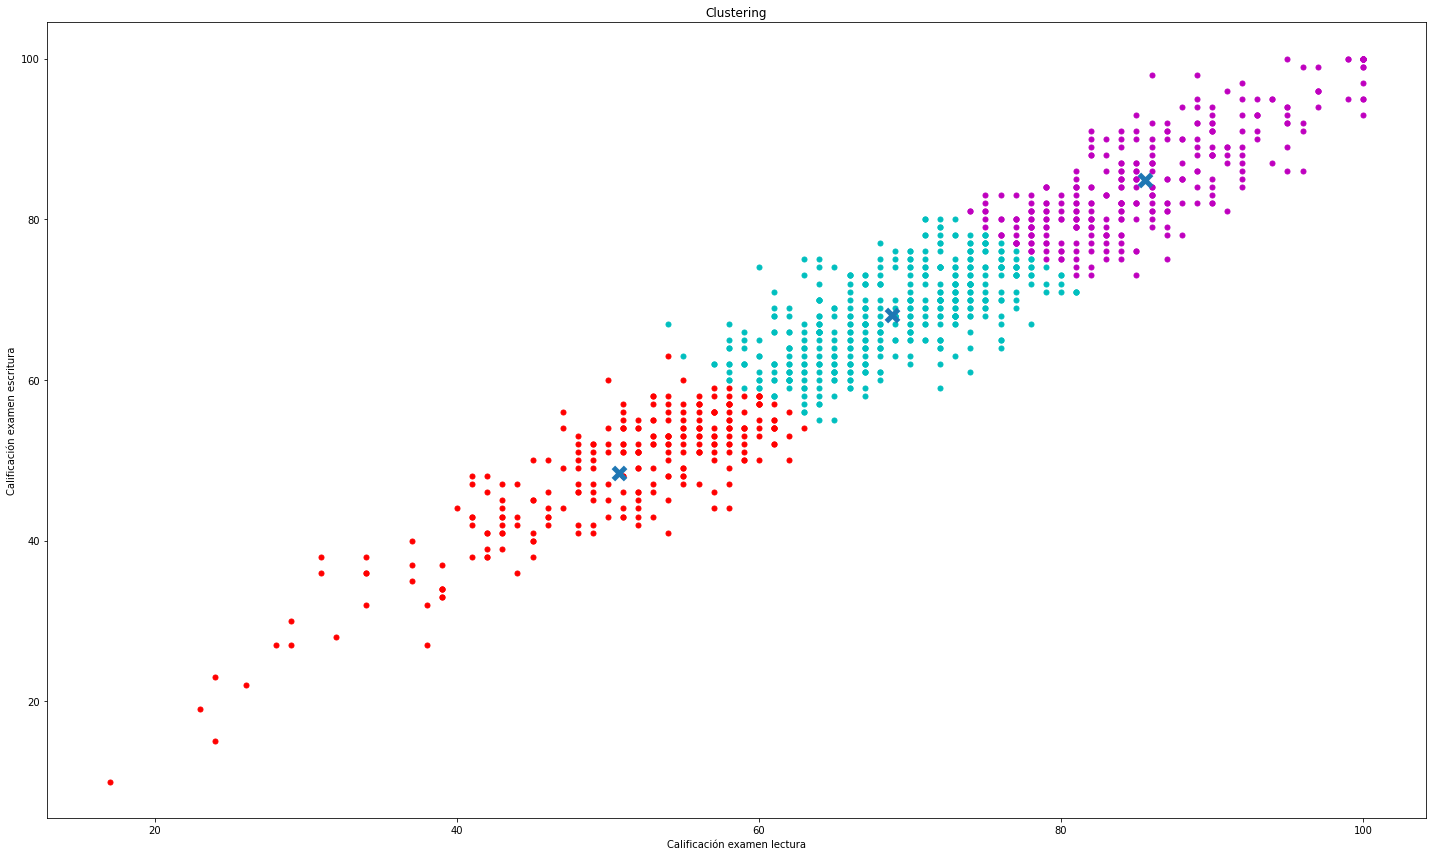

In [56]:
plt.figure(figsize = (20,12))
for i in range (len(X)):
  plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize = 10)
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 150,linewidths = 5, zorder = 10)
plt.xlabel('Calificación examen lectura')
plt.ylabel('Calificación examen escritura')
plt.title('Clustering')
plt.tight_layout()

De los 3 grupos que buscamos notemos que se encuentra uno que oscila entre las calificaciones de lectura de 0 a 60 con las calificaciones de escritura de 0 a 60, además encontró un segundo grupo entre las calificaciones de lectura en 60 a 80 así mismo en las calificaciones de escritura de 60 a 80, dando paso al último grupo con calificaciones de 80 a 100 en ambos examenes.

Realizamos un estudio de clasificación mediante 'K-nearest Neighbors', en este caso veremos si es viable predecir que un estudiante es mujer basado en el puntaje del examen de lectura, escritura y matemáticas.

Retomando la base de datos que construimos y llamamos 'Data2'

In [57]:
Data2

,Mujer,Hombre,Grupo Etnico A,Grupo Etnico B,Grupo Etnico C,Grupo Etnico D,Grupo Etnico E,Educacion Parental - Grado Asociado,Educacion Parental - Universitario,Educacion Parental - Preparatoria,Educacion Parental - Maestria,Educacion Parental - Colegio Asociado,Educacion Parental - Preparatoria Asociada,Comida - Incompleta,Comida - Completa,Curso Preparacion - Completo,Curso Preparacion - Incompleto,Puntaje Matematicas,Puntaje Lectura,Puntaje Escritura
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72,72,74
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69,90,88
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90,95,93
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47,57,44
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,88,99,95
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,62,55,55
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,59,71,65
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,68,78,77


Vamos a crear un diccionario que contenga las etiquetas (hombre, mujer) para que cuando hagamos una predicción no nos arroje un número (0,1) si no el nombre de la etiqueta.

In [58]:
Data2.loc[:,'Mujer'].value_counts()

1    518
0    482
Name: Mujer, dtype: int64

In [59]:
Pred = {0:'hombre',1:'mujer'}

In [60]:
X_ = Data2[['Puntaje Matematicas','Puntaje Lectura','Puntaje Escritura']]
Y_ = Data2['Mujer']

Vamos asignar el $30\%$ de los datos a las pruebas

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_,Y_,test_size = 0.3)

Veamos las estadísticas de los valores a entrenar

In [62]:
X_train.describe()

,Puntaje Matematicas,Puntaje Lectura,Puntaje Escritura
count,700.000000,700.000000,700.000000
mean,66.151429,69.292857,68.177143
std,15.217073,14.723050,15.302296
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


Recordemos que la función 'KNeighborsClassifier' se basa en estudiar cuantos datos tiene como vecinos para poder predecir el lugar que le corresponde a otro dato

Crearemos una variable llamada 'vecinos' para ir incrementando el número de vecinos a estudiar y su exactitud, iremos desde 1 hasta 50 vecinos

In [63]:
vecinos = list(range(1,51))

Crearemos un arreglo de longitud 'vecinos' para el entrenamiento y las pruebas

In [64]:
train_exactitud = np.empty(len(vecinos))
test_exactitud = np.empty(len(vecinos))

Creamos el ciclo for que nos ayuda a entrenar el modelo en cada iteracion en función 

In [65]:
for it1, it2 in enumerate(vecinos):
  knn = KNeighborsClassifier(n_neighbors=it2)
  knn.fit(X_train,Y_train)
  train_exactitud[it1] = knn.score(X_train,Y_train)
  test_exactitud[it1] = knn.score(X_test,Y_test)

Graficamos los resultados

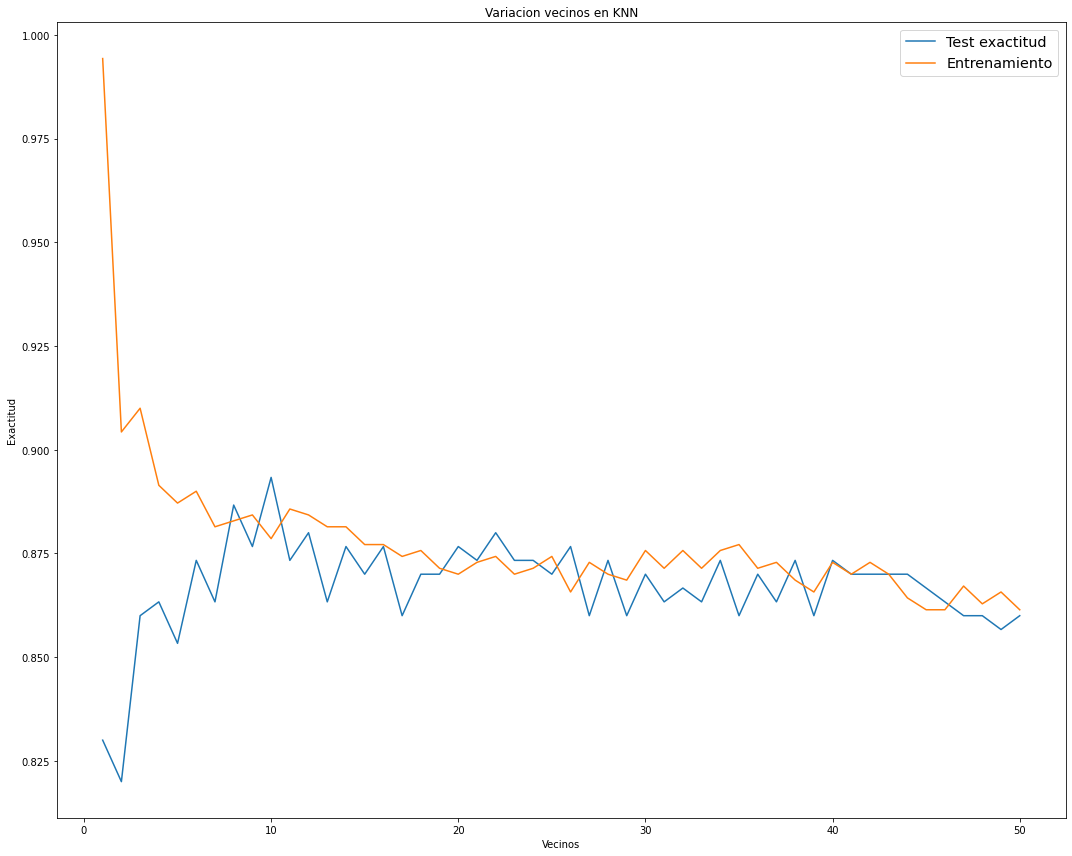

In [66]:
plt.figure(figsize = (15,12))
plt.title('Variacion vecinos en KNN')
plt.plot(vecinos,test_exactitud,label = 'Test exactitud')
plt.plot(vecinos,train_exactitud,label = 'Entrenamiento')
plt.legend(fontsize = 'x-large')
plt.xlabel('Vecinos')
plt.ylabel('Exactitud')
plt.tight_layout()

Del gráfico anterior podemos observar que cuando el número de vecinos incrementa la exactitud del entrenamiento y la prueba se asemejan.

Vamos a predecir un valor tomando 50 vecinos, puntaje en matemáticas 72, puntaje en lectura 72 y puntaje en escritura 74. Que, previamente, sabemos que el resultado sería mujer.

In [67]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,Y_train)
pred1 = knn.predict([[72,72,74]])

La exactitud que tendremos con el valor resultado será

In [68]:
knn.score(X_test,Y_test)

0.86

Recordamos que utilizamos un diccionario para ver el resultado con etiquetas y no números, lo utilizamos ahora

In [69]:
Pred[pred1[0]]

'mujer'